In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_all_mod = pd.read_csv("all_mod_data_tissue_annotation1.tsv", sep='\t')

In [3]:
data_all_mod.head()

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional
0,PXD000004,AEVMADTAVALASGNVK,T,2034,P21359,2028,2044,447,[447]Deoxy,Brain,None,None,None,None
1,PXD000004,DMGEMVTQGQTDAQYMFLR,T,1129,Q01082,1123,1141,4,[4]Carbamidomethyl,Brain,None,None,None,None
2,PXD000004,GGPNTVTPPPTTPEWVK,T,87,Q13733,83,99,1,[1]Acetyl,Brain,None,None,None,None
3,PXD000004,QVSSLLTNHLAR,S,1357,Q9Y4D8,1355,1366,385,[385]Ammonia-loss,Brain,None,None,None,None
4,PXD000004,ITFTPSSGIASEVTVPK,S,728,Q92752,718,734,327,[327]Delta:H(4)C(2)O(-1)S(1),Brain,None,None,None,None


In [4]:
print(data_all_mod.shape[0])
print(data_all_mod["ACC_ID"].nunique())
print(data_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])

4049444
17828
196404


In [5]:
data_all_mod = data_all_mod[(data_all_mod["proj"]!="PXD001985")&(data_all_mod["proj"]!="PXD002014")&(data_all_mod["proj"]!="PXD002437")&
            (data_all_mod["proj"]!="PXD003533")&(data_all_mod["proj"]!="PXD004683")&(data_all_mod["proj"]!="PXD006095")&
            (data_all_mod["proj"]!="PXD006911")&(data_all_mod["proj"]!="PXD008568")&(data_all_mod["proj"]!="PXD009880")&
            (data_all_mod["proj"]!="PXD011241")&(data_all_mod["proj"]!="PXD011309")]

In [6]:
print(len(data_all_mod.groupby(["proj"], as_index=False).agg({"ACC_ID": "first"})["proj"].to_list()))

150


In [7]:
print(data_all_mod.shape[0])
print(data_all_mod["ACC_ID"].nunique())
print(data_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])

4042382
17824
196137


In [8]:
data_all_mod["unimod"].nunique()

133

In [9]:
data_all_mod["modification"].value_counts()

[40]Sulfo                     614796
[4]Carbamidomethyl            498421
[35]Oxidation                 256239
[122]Formyl                   221912
[447]Deoxy                    219370
                               ...  
[684]BDMAPP                      234
[534]Dibromo                     129
[1801]Fluorescein-tyramine       127
[131]Triiodo                      23
[397]Triiodothyronine              8
Name: modification, Length: 133, dtype: int64

In [10]:
data_all_mod.head()

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional
0,PXD000004,AEVMADTAVALASGNVK,T,2034,P21359,2028,2044,447,[447]Deoxy,Brain,None,None,None,None
1,PXD000004,DMGEMVTQGQTDAQYMFLR,T,1129,Q01082,1123,1141,4,[4]Carbamidomethyl,Brain,None,None,None,None
2,PXD000004,GGPNTVTPPPTTPEWVK,T,87,Q13733,83,99,1,[1]Acetyl,Brain,None,None,None,None
3,PXD000004,QVSSLLTNHLAR,S,1357,Q9Y4D8,1355,1366,385,[385]Ammonia-loss,Brain,None,None,None,None
4,PXD000004,ITFTPSSGIASEVTVPK,S,728,Q92752,718,734,327,[327]Delta:H(4)C(2)O(-1)S(1),Brain,None,None,None,None


In [11]:
data_all_mod["tissue"] = data_all_mod["tissue"].replace(["Kiney"], "Kidney")
data_all_mod[data_all_mod["tissue"].str.contains("Kiney")]

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional


In [12]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

In [13]:
for tissue in list_tissues_STY:
    print(tissue)
    print(data_all_mod[data_all_mod["tissue"]==tissue]["modification"].value_counts())

Adipose tissue
Series([], Name: modification, dtype: int64)
B-cells
[4]Carbamidomethyl        4055
[122]Formyl               1796
[447]Deoxy                1674
[35]Oxidation             1473
[40]Sulfo                 1357
                          ... 
[1279]Difuran                1
[49]Phosphopantetheine       1
[1412]s-GlcNAc               1
[131]Triiodo                 1
[1413]PhosphoHex(2)          1
Name: modification, Length: 121, dtype: int64
Blood
[4]Carbamidomethyl            44183
[35]Oxidation                 34931
[728]Methylphosphonate        34461
[34]Methyl                    32312
[447]Deoxy                    24756
                              ...  
[292]IodoU-AMP                   15
[1801]Fluorescein-tyramine       15
[534]Dibromo                      6
[131]Triiodo                      2
[397]Triiodothyronine             1
Name: modification, Length: 133, dtype: int64
Bone
[4]Carbamidomethyl     899
[122]Formyl            855
[472]AEC-MAEC          394
[447]Deoxy 

[4]Carbamidomethyl            21547
[35]Oxidation                 20224
[5]Carbamyl                   19771
[447]Deoxy                    16874
[34]Methyl                    14920
                              ...  
[417]PhosphoUridine               6
[1934]HexNAc(2)Sulf(1)            6
[478]FTC                          3
[292]IodoU-AMP                    2
[1801]Fluorescein-tyramine        2
Name: modification, Length: 130, dtype: int64
Lymph node
[40]Sulfo                 62763
[898]pyrophospho           8623
[2007]Methamidophos-S      1935
[728]Methylphosphonate      861
[447]Deoxy                  721
                          ...  
[849]cGMP                     1
[292]IodoU-AMP                1
[417]PhosphoUridine           1
[1279]Difuran                 1
[534]Dibromo                  1
Name: modification, Length: 127, dtype: int64
Menstrual fluid
[4]Carbamidomethyl          1466
[58]Propionyl                663
[354]Nitro                   621
[447]Deoxy                   602
[

[4]Carbamidomethyl            29676
[35]Oxidation                 14371
[122]Formyl                   12998
[447]Deoxy                     6204
[40]Sulfo                      5946
                              ...  
[684]BDMAPP                       4
[534]Dibromo                      3
[478]FTC                          3
[130]Diiodo                       2
[1801]Fluorescein-tyramine        1
Name: modification, Length: 131, dtype: int64
Ureter
[122]Formyl                 3537
[35]Oxidation                533
[898]pyrophospho             384
[34]Methyl                   361
[447]Deoxy                   281
                            ... 
[49]Phosphopantetheine         1
[1933]Hex(1)Pent(2)Me(1)       1
[442]FMN                       1
[431]Palmitoleyl               1
[400]Tyr->Dha                  1
Name: modification, Length: 115, dtype: int64
Urinary bladder
[4]Carbamidomethyl              9094
[447]Deoxy                      5323
[34]Methyl                      3681
[472]AEC-MAEC  

# On the protein level

In [14]:
data_all_mod_proteins = data_all_mod.groupby(["ACC_ID"], as_index=False).agg({"tissue": lambda x: ",".join(x)})
print(data_all_mod_proteins.shape[0])
data_all_mod_proteins.head()

17824


,ACC_ID,tissue
0,A0A024RBG1,"Liver,Umbilical cord,Kidney,Testis,Testis,Test..."
1,A0A075B6H7,"Breast,Breast,Breast,Breast,Breast,Breast,Brea..."
2,A0A075B6H9,"PBMC,PBMC,Liver,Menstrual fluid,Brain,Brain,Br..."
3,A0A075B6I0,"Monocytes,Blood,Lung,Lung,Lung,Lung,Lung,Lung,..."
4,A0A075B6I1,"Menstrual fluid,Brain,Brain,Brain,Brain,Nasal ..."


In [15]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
for tissue in list_tissues_STY:
    data_all_mod_proteins[tissue] = data_all_mod_proteins["tissue"].str.contains(tissue)
data_all_mod_proteins.replace({True:1, False:0}, inplace=True)
data_all_mod_proteins["Total"] = data_all_mod_proteins[list_tissues_STY].sum(axis=1)
data_all_mod_proteins.head()

,ACC_ID,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A024RBG1,"Liver,Umbilical cord,Kidney,Testis,Testis,Test...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,4
1,A0A075B6H7,"Breast,Breast,Breast,Breast,Breast,Breast,Brea...",0,0,1,0,1,1,1,1,...,1,1,1,1,0,0,1,1,1,29
2,A0A075B6H9,"PBMC,PBMC,Liver,Menstrual fluid,Brain,Brain,Br...",0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,12
3,A0A075B6I0,"Monocytes,Blood,Lung,Lung,Lung,Lung,Lung,Lung,...",0,0,1,0,1,0,1,1,...,0,1,0,1,0,0,0,0,1,18
4,A0A075B6I1,"Menstrual fluid,Brain,Brain,Brain,Brain,Nasal ...",0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,9


In [16]:
data_all_mod_proteins["Total"].value_counts()

1     1880
2     1412
3     1156
5     1071
6     1061
4     1033
7      958
8      917
9      796
10     766
11     717
12     641
13     561
14     529
17     455
15     442
16     440
18     383
19     322
21     277
20     268
22     246
24     217
23     216
25     184
26     166
27     139
28     118
29      99
30      72
31      64
32      54
35      44
33      37
34      23
36      18
39      14
37      14
38      11
40       2
41       1
Name: Total, dtype: int64

In [17]:
data_phospho_protein = pd.read_csv("protein_data", sep="\t")
print(data_phospho_protein.shape[0])
data_phospho_protein.head()

5855


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data_phospho_protein["Total"].value_counts()

1     2029
2      965
3      595
4      514
7      337
5      287
6      196
8      187
9      138
10     109
11      99
12      70
13      51
16      43
15      43
14      38
17      35
18      30
23      16
22      15
19      14
20      12
25       9
21       8
24       5
26       4
29       3
27       3
Name: Total, dtype: int64

In [19]:
data_all_mod_proteins[data_all_mod_proteins["Total"]==0]

,ACC_ID,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total


In [20]:
nr_tissues_expressed = data_all_mod_proteins.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed["phosphoproteins"]=data_phospho_protein.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed

,Number of tissues,other modifications,phosphoproteins
0,1,1880,2029.0
1,2,1412,965.0
2,3,1156,595.0
3,4,1033,514.0
4,5,1071,287.0
5,6,1061,196.0
6,7,958,337.0
7,8,917,187.0
8,9,796,138.0
9,10,766,109.0


<AxesSubplot:title={'center':'Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='Number of proteins'>

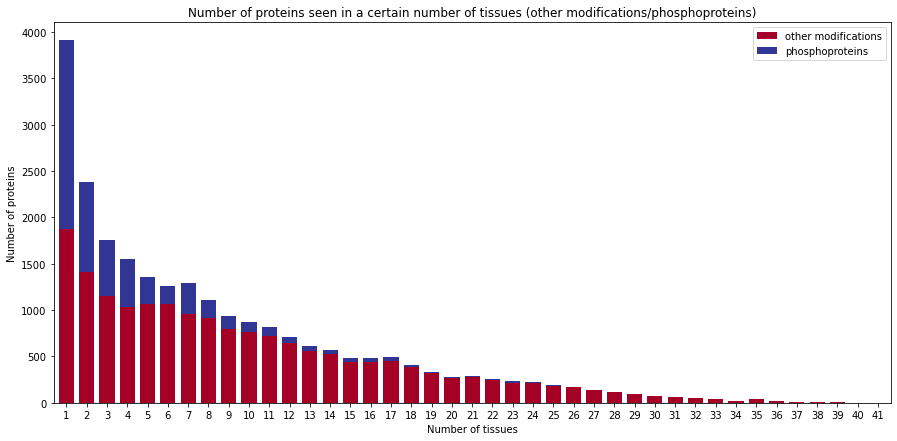

In [21]:
nr_tissues_expressed.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="RdYlBu",
                          title="Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="Number of proteins", width=0.75)

In [22]:
nr_tissues_expressed["log(other modifications)"] = np.log10(nr_tissues_expressed["other modifications"])
nr_tissues_expressed["log(phosphoproteins)"] = np.log10(nr_tissues_expressed["phosphoproteins"])

<AxesSubplot:title={'center':'Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='log(Number of proteins)'>

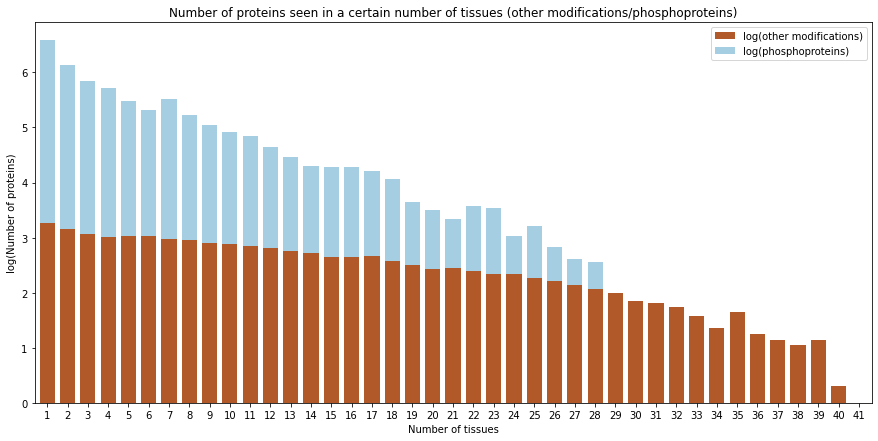

In [23]:
nr_tissues_expressed[["Number of tissues", "log(other modifications)", "log(phosphoproteins)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="log(Number of proteins)", width=0.75)
#plt.savefig("WP3 number tissues all_proteins.png", format="png", bbox_inches="tight")

Retaining only these proteins from all but the phosphorylation dataset that were seen in the phosphorylation dataset.

In [24]:
data_all_mod_proteins_sub = pd.merge(data_phospho_protein["ACC_ID"], data_all_mod_proteins, how="inner", on=["ACC_ID"])
print(data_all_mod_proteins_sub["ACC_ID"].nunique())
print("Proteins not found otherwise modified on STY-sites: {}".format((data_phospho_protein["ACC_ID"].nunique()-data_all_mod_proteins_sub["ACC_ID"].nunique())))
data_all_mod_proteins_sub.head()

5826
Proteins not found otherwise modified on STY-sites: 29


,ACC_ID,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,"Breast,Breast,Breast,Breast,Breast,Breast,Brea...",0,0,1,0,1,1,1,1,...,1,1,1,1,0,0,1,1,1,29
1,A0A075B6S5,"Breast,Breast,Breast,PBMC,Lung,Lung,Lung,Lung,...",0,0,1,0,1,1,1,1,...,0,1,1,1,0,0,0,1,1,26
2,A0A087WXM9,"Urinary bladder, Colon, Kidney, Liver,Brain,Bl...",1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,8
3,A0A0B4J2D5,"Liver,Liver,Liver,Liver,Liver,Liver,Liver,Live...",1,0,1,0,1,1,1,1,...,1,0,0,1,0,1,0,1,0,25
4,A0A0B4J2D9,"PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,Ureter...",0,0,1,0,1,0,1,1,...,1,1,1,1,0,0,1,1,1,28


In [25]:
nr_tissues_expressed2 = data_all_mod_proteins_sub.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed2.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed2["phosphoproteins"]=data_phospho_protein.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed2

,Number of tissues,other modifications,phosphoproteins
0,1,84,2029.0
1,2,126,965.0
2,3,131,595.0
3,4,162,514.0
4,5,167,287.0
5,6,205,196.0
6,7,247,337.0
7,8,257,187.0
8,9,239,138.0
9,10,281,109.0


<AxesSubplot:title={'center':'Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated'}, xlabel='Number of tissues', ylabel='Number of proteins'>

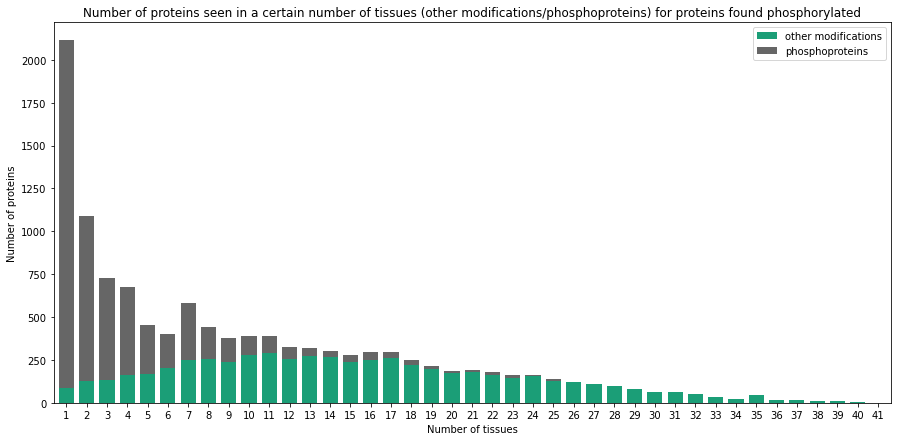

In [26]:
nr_tissues_expressed2.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Dark2",
                          title="Number of proteins seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated",
                          xlabel= "Number of tissues", ylabel="Number of proteins", width=0.75)

In [27]:
nr_tissues_expressed2["log(other modifications)"] = np.log10(nr_tissues_expressed2["other modifications"])
nr_tissues_expressed2["log(phosphoproteins)"] = np.log10(nr_tissues_expressed2["phosphoproteins"])

In [28]:
nr_tissues_expressed2

,Number of tissues,other modifications,phosphoproteins,log(other modifications),log(phosphoproteins)
0,1,84,2029.0,1.924279,3.307282
1,2,126,965.0,2.100371,2.984527
2,3,131,595.0,2.117271,2.774517
3,4,162,514.0,2.209515,2.710963
4,5,167,287.0,2.222716,2.457882
5,6,205,196.0,2.311754,2.292256
6,7,247,337.0,2.392697,2.527630
7,8,257,187.0,2.409933,2.271842
8,9,239,138.0,2.378398,2.139879
9,10,281,109.0,2.448706,2.037426


<AxesSubplot:title={'center':'Number of phosphoproteins seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='log(Number of proteins)'>

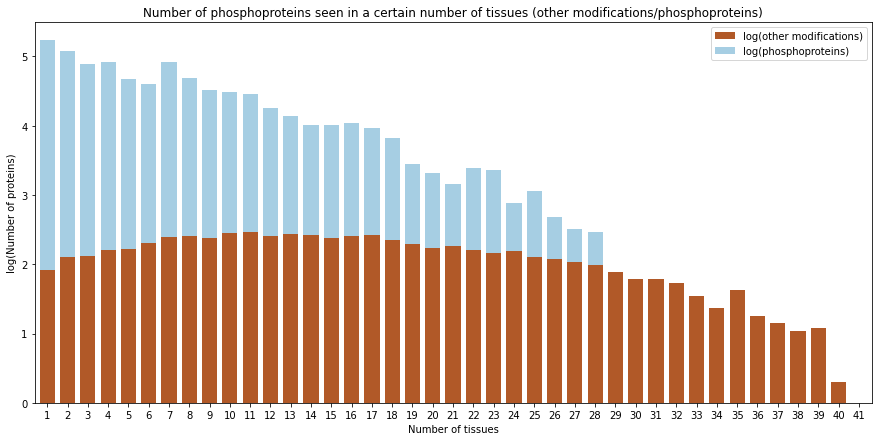

In [29]:
nr_tissues_expressed2[["Number of tissues", "log(other modifications)", "log(phosphoproteins)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of phosphoproteins seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="log(Number of proteins)", width=0.75)
#plt.savefig("WP3 number tissues proteins.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'Proteins having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

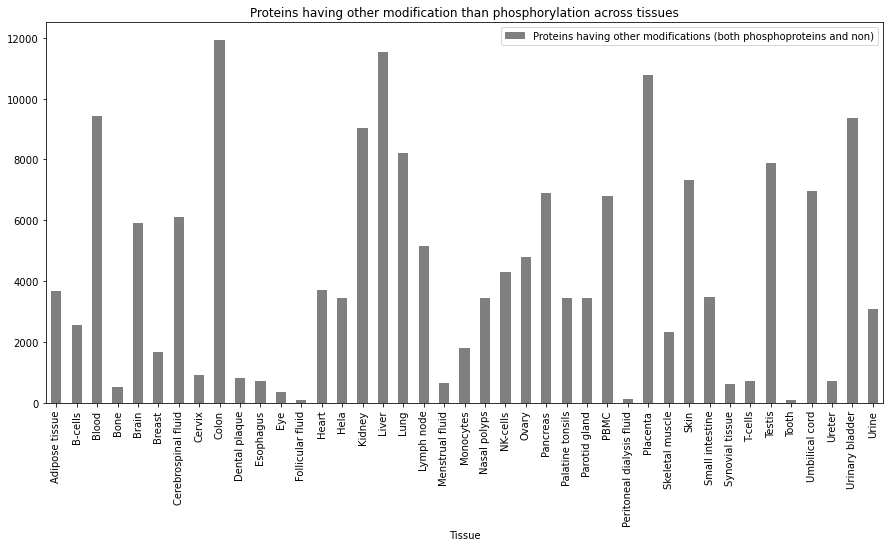

In [30]:
data_all_mod_proteins_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_proteins[tissue].sum()
    list_counts.append(count)
data_all_mod_proteins_tissues["Proteins having other modifications (both phosphoproteins and non)"] = list_counts
data_all_mod_proteins_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Proteins having other modification than phosphorylation across tissues", color="tab:grey")

<AxesSubplot:title={'center':'Proteins having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

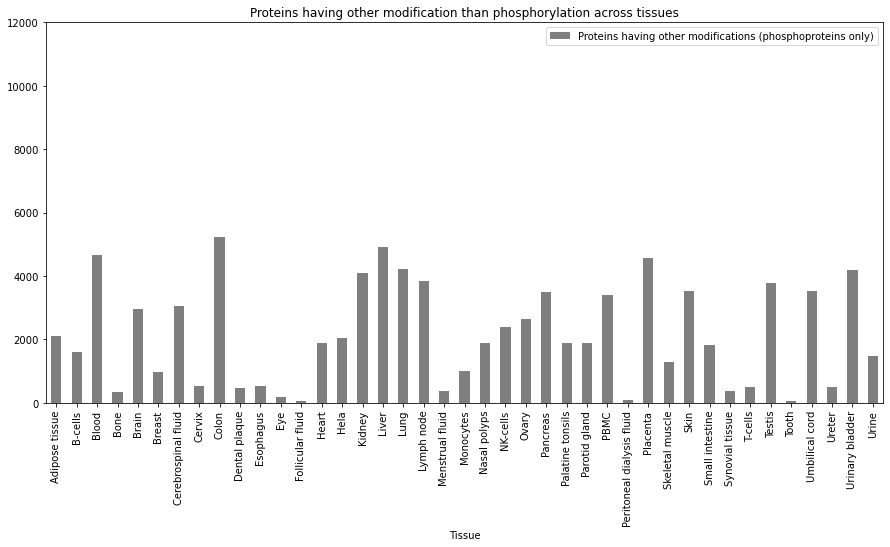

In [31]:
data_all_mod_proteins_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_proteins_sub[tissue].sum()
    list_counts.append(count)
data_all_mod_proteins_tissues["Proteins having other modifications (phosphoproteins only)"] = list_counts
data_all_mod_proteins_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Proteins having other modification than phosphorylation across tissues", color="tab:grey", ylim=[0,12000])

In [32]:
list_counts = []
for tissue in list_tissues_STY:
    count = data_phospho_protein.loc[(data_phospho_protein[tissue]==1), "ACC_ID"].nunique()
    list_counts.append(count)
data_all_mod_proteins_tissues["Proteins phosphorylated"] = list_counts

<AxesSubplot:title={'center':'Amount of phosphoproteins phosphorylated and otherwise modified'}, xlabel='Tissue'>

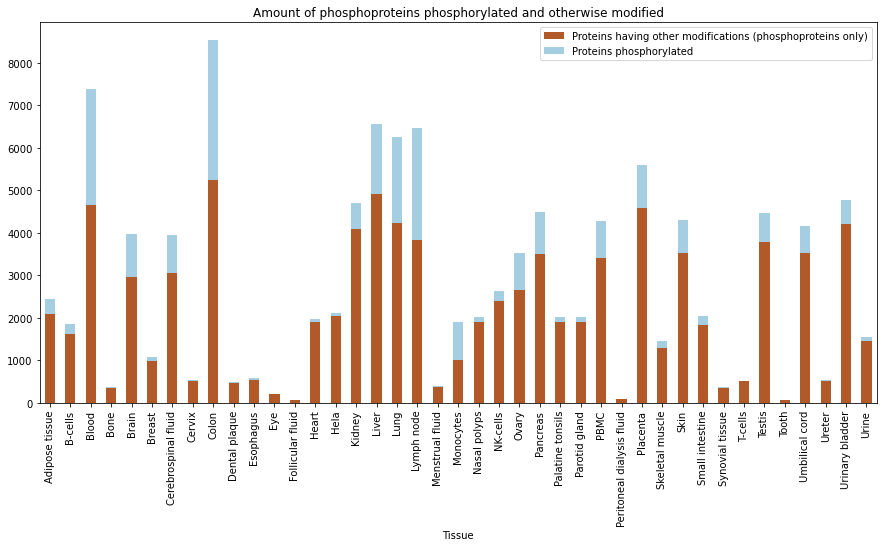

In [33]:
data_all_mod_proteins_tissues.plot(x="Tissue", kind="bar", stacked=True, figsize=(15,7), title="Amount of phosphoproteins phosphorylated and otherwise modified", colormap="Paired_r")
#plt.savefig("WP3 phosphoproteins and otherwise modified per tissue.png", format="png", bbox_inches="tight")

In [34]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")

In [35]:
tspec_all_mod = pd.merge(tspec_proteins, data_all_mod_proteins_sub, how="inner", on="ACC_ID", suffixes=["_P", "_all_mod"])
print(tspec_all_mod.shape[0])
print("Tissue-specific phosphorylated proteins not found modified: {}".format(tspec_proteins["ACC_ID"].nunique()-tspec_all_mod["ACC_ID"].nunique()))
tspec_all_mod.head()

2008
Tissue-specific phosphorylated proteins not found modified: 21


,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Small intestine_all_mod,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod
0,A0A075B6H7,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,1,29
1,A0A075B6S5,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,1,26
2,A0A087WXM9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,8
3,A0A0B4J2D5,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,25
4,A0A0B4J2D9,0,0,1,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,1,28


In [36]:
taspec_all_mod = pd.merge(taspec_proteins, data_all_mod_proteins_sub, how="inner", on="ACC_ID", suffixes=["_P", "_all_mod"])
print(taspec_all_mod.shape[0])
print("Tissue aspecific phosphorylated proteins not found modified: {}".format(taspec_proteins["ACC_ID"].nunique()-taspec_all_mod["ACC_ID"].nunique()))
taspec_all_mod.head()

2068
Tissue aspecific phosphorylated proteins not found modified: 6


,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Small intestine_all_mod,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod
0,A0A0C4DH36,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,15
1,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
2,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
3,A0M8Q6,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,1,31
4,A0MZ66,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,1,21


In [37]:
gen_all_mod = pd.merge(gen_proteins, data_all_mod_proteins_sub, how="inner", on="ACC_ID", suffixes=["_P", "_all_mod"])
print(gen_all_mod.shape[0])
print("Pervasively phosphorylated proteins not found modified: {}".format(gen_proteins["ACC_ID"].nunique()-gen_all_mod["ACC_ID"].nunique()))
gen_all_mod.head()

1750
Pervasively phosphorylated proteins not found modified: 2


,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Small intestine_all_mod,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod
0,A0A0C4DH39,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,7
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,21
2,A0JNW5,0,0,1,0,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,19
3,A2RU30,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
4,A5A3E0,1,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,38


In [38]:
gen_all_mod_not = pd.merge(gen_proteins, data_all_mod_proteins_sub, how="left", on="ACC_ID", suffixes=["_P", "_all_mod"], indicator = True)
gen_all_mod_not[gen_all_mod_not["_merge"]=="left_only"]["Total_P"]

1018    7
1744    7
Name: Total_P, dtype: int64

In [39]:
tspec_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    tspec_all_mod.loc[(tspec_all_mod[tissueP]==0)&(tspec_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
tspec_all_mod.head()

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
0,A0A075B6H7,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,29,28
1,A0A075B6S5,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,26,25
2,A0A087WXM9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,8,8
3,A0A0B4J2D5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,25,24
4,A0A0B4J2D9,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,28,27


In [40]:
#Compared to 2029
tspec_all_mod[tspec_all_mod["Total_nonP"] <= tspec_all_mod["Total_all_mod"]]["ACC_ID"].nunique()

2008

In [41]:
taspec_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    taspec_all_mod.loc[(taspec_all_mod[tissueP]==0)&(taspec_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
taspec_all_mod.head()

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
0,A0A0C4DH36,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,15,13
1,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,10,8
2,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6,3
3,A0M8Q6,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,31,27
4,A0MZ66,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,1,21,17


In [42]:
#compared to 2074
taspec_all_mod[taspec_all_mod["Total_nonP"] <= taspec_all_mod["Total_all_mod"]]["ACC_ID"].nunique()

2068

In [43]:
gen_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_all_mod.loc[(gen_all_mod[tissueP]==0)&(gen_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
gen_all_mod.head()

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
0,A0A0C4DH39,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,7,2
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,21,16
2,A0JNW5,0,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,19,11
3,A2RU30,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,4,4
4,A5A3E0,1,0,1,0,1,1,1,0,1,...,1,1,1,0,1,1,1,1,38,15


In [44]:
#compared to 1752
gen_all_mod[gen_all_mod["Total_nonP"] < gen_all_mod["Total_all_mod"]]["ACC_ID"].nunique()

1736

37 tissue-specific phopshorylated proteins have been identified only in the tissue they have been found phosphorylated in (1,82%). The vast majority of proteins has been identified in 2-10 extra tissues with another modification. 21 proteins have not been identified with a modification other than phosphorylation (1,03%).

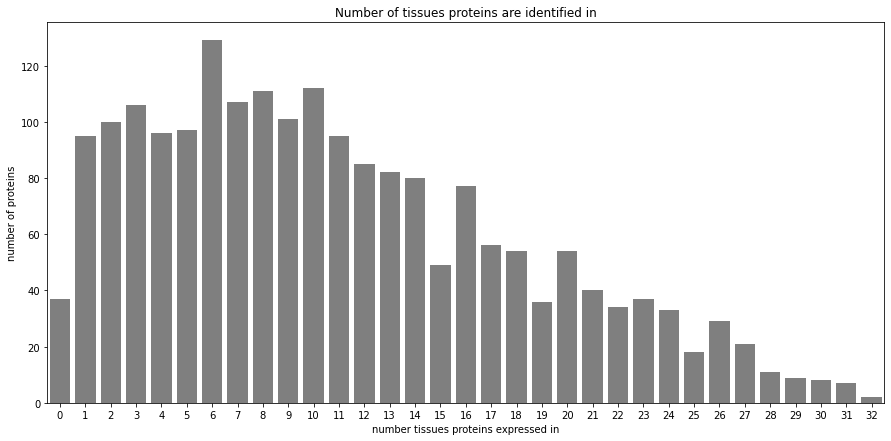

In [45]:
plot = tspec_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="tab:grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 tissue specific proteins in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [46]:
for tissue in list_tissues_STY:
    tissue = tissue+"_all_mod"
    if tspec_all_mod.loc[(tspec_all_mod["Total_nonP"]>=30)&(tspec_all_mod[tissue]==0)].shape[0] != 0:
        print(tissue)

B-cells_all_mod
Bone_all_mod
Breast_all_mod
Cervix_all_mod
Dental plaque_all_mod
Esophagus_all_mod
Eye_all_mod
Follicular fluid_all_mod
Heart_all_mod
Lymph node_all_mod
Menstrual fluid_all_mod
Monocytes_all_mod
NK-cells_all_mod
Peritoneal dialysis fluid_all_mod
Skeletal muscle_all_mod
Synovial tissue_all_mod
T-cells_all_mod
Tooth_all_mod
Ureter_all_mod
Urine_all_mod


In [47]:
plot

,Total_nonP,ACC_ID
0,0,37
1,1,95
2,2,100
3,3,106
4,4,96
5,5,97
6,6,129
7,7,107
8,8,111
9,9,101


22 out of 2074 (1,06%) proteins have not been identifed in another tissue than the one they were found phopshorylated in. Most proteins have been identified in 6-14 tissues other than the ones they were found phosphorylated in. 6 proteins (0,29%) are not associated wtih a single other modification.

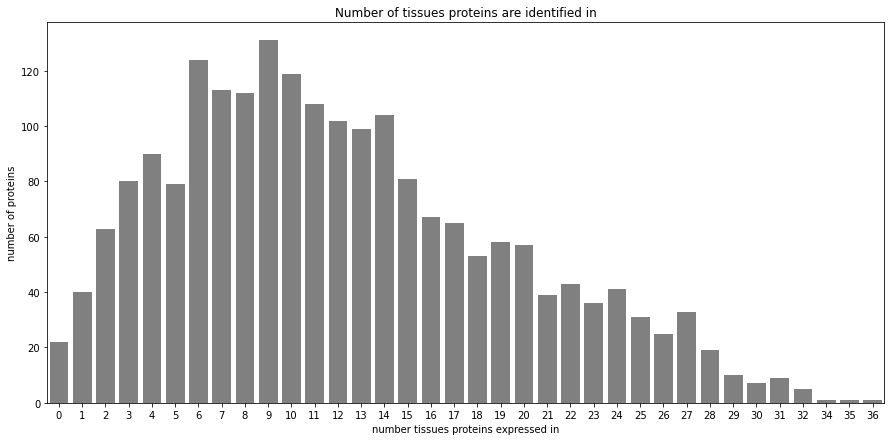

In [48]:
plot = taspec_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 tissue aspecific proteins in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [49]:
plot

,Total_nonP,ACC_ID
0,0,22
1,1,40
2,2,63
3,3,80
4,4,90
5,5,79
6,6,124
7,7,113
8,8,112
9,9,131


18 out of 1752 proteins (1,03%) are not found modified in another tissue than the ones they were found phosphorylated in. Most proteins were identified in 5-11 extra tissues. 16 proteins have not been associated with another modification than phosphorylation (0,91%).

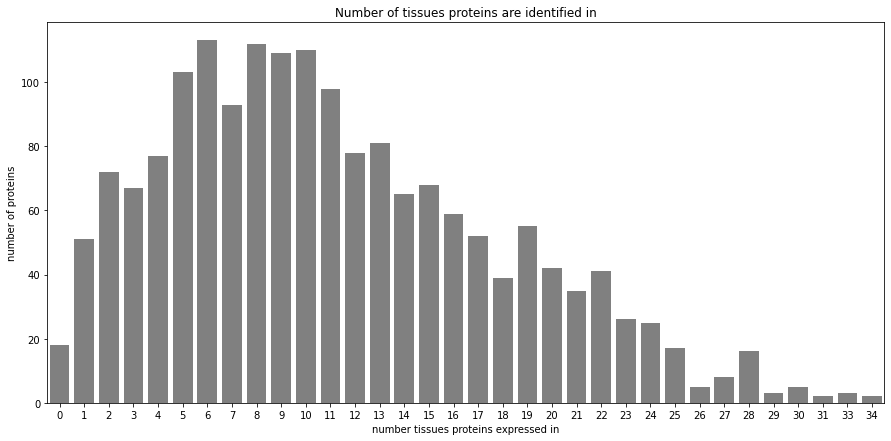

In [50]:
plot = gen_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 pervasive proteins in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [51]:
plot

,Total_nonP,ACC_ID
0,0,18
1,1,51
2,2,72
3,3,67
4,4,77
5,5,103
6,6,113
7,7,93
8,8,112
9,9,109


In [52]:
gen_all_mod[gen_all_mod["Total_all_mod"]>35]

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
4,A5A3E0,1,0,1,0,1,1,1,0,1,...,1,1,1,0,1,1,1,1,38,15
9,A6NMY6,1,0,1,0,0,1,0,0,1,...,1,0,1,0,1,1,1,1,38,25
88,O43707,1,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,36,31
133,O75369,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,36,24
207,P01024,0,0,1,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,37,31
210,P01834,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,36,11
218,P02042,0,0,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,38,20
223,P02533,0,0,1,0,1,1,1,0,0,...,0,1,1,1,1,1,1,1,40,24
224,P02538,0,0,0,0,0,0,0,1,1,...,1,0,1,1,1,1,1,1,37,25
227,P02671,0,0,1,0,1,0,1,0,1,...,1,1,1,0,1,1,1,1,36,16


In [53]:
gen_all_mod[gen_all_mod["Total_all_mod"]>=40]
#KRT14, keratin (40); ALB, albumin(40); KRT1, keratin(41) -> warned as often found as contaminant in proteomics

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
223,P02533,0,0,1,0,1,1,1,0,0,...,0,1,1,1,1,1,1,1,40,24
235,P02768,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,40,14
246,P04264,1,0,1,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,41,25


In [54]:
gen_all_mod_20 = gen_all_mod[gen_all_mod["Total_P"]>=20]
print(gen_proteins[gen_proteins["Total"]>=20]["ACC_ID"].nunique())
print(gen_all_mod_20.shape[0])
gen_all_mod_20.head()

75
75


,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
4,A5A3E0,1,0,1,0,1,1,1,0,1,...,1,1,1,0,1,1,1,1,38,15
24,O00264,1,0,1,0,1,1,1,0,1,...,0,0,1,0,1,1,1,0,25,3
51,O14950,1,1,1,0,1,0,1,0,1,...,0,0,1,0,1,1,1,0,31,10
97,O43852,1,1,1,1,1,0,1,0,1,...,0,0,1,0,1,1,1,1,26,5
167,O94979,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,28,6


All proteins seen phosphorylated are at least found modified in 1 other tissues (other modification), either with 14-16 more tissues or with 4-5 more.

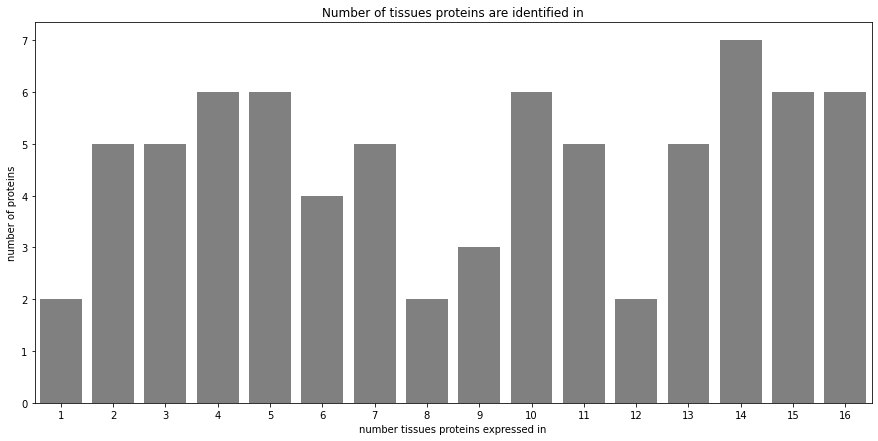

In [55]:
plot = gen_all_mod_20.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues proteins expressed in",
                                                  ylabel = "number of proteins", title = "Number of tissues proteins are identified in")
#plt.savefig("WP3 pervasive proteins_20plus in modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [56]:
plot["ACC_ID"].sum()

75

In [57]:
gen_all_mod_20_mod = gen_all_mod_20.copy()
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_all_mod_20_mod.loc[(gen_all_mod_20_mod[tissueP]==1)&(gen_all_mod_20_mod[tissue_all_mod]==1), tissue_all_mod] = 0
gen_all_mod_20_mod

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
4,A5A3E0,1,0,1,0,1,1,1,0,1,...,1,1,0,0,0,1,0,1,38,15
24,O00264,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,1,0,0,25,3
51,O14950,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,31,10
97,O43852,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,1,26,5
167,O94979,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,28,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,Q9HBL0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,23,3
1568,Q9NYF8,1,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,25,1
1619,Q9UHB6,1,1,1,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,26,5
1678,Q9UQ35,0,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,28,6


Most proteins identified with a P-site in at least 20 tissues, were found otherwise modified in tissues that contribute few P-sites, but were otherwise well represented.

<AxesSubplot:title={'center':'Number of phosphoproteins having modifications other than phopshorylation'}, xlabel='Tissue'>

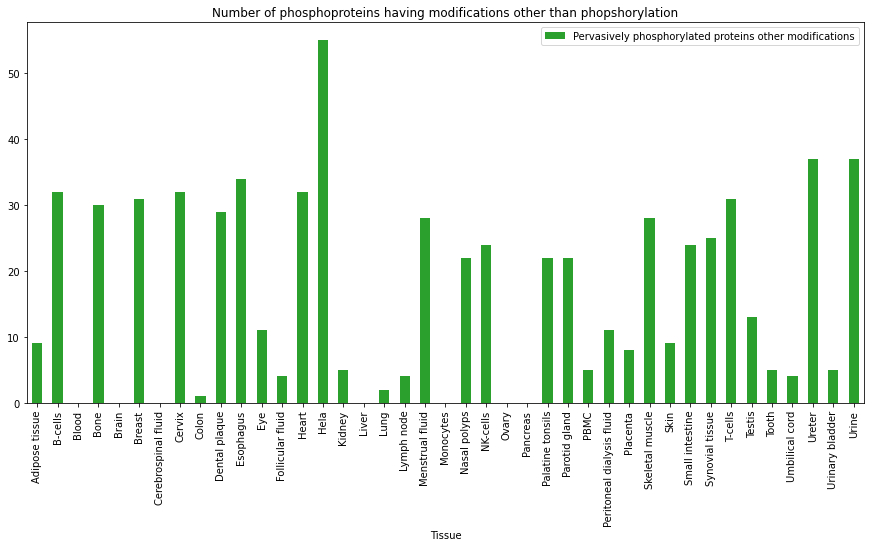

In [58]:
df_gen_all_mod_20_mod_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    tissue = tissue+"_all_mod"
    count = gen_all_mod_20_mod[tissue].sum()
    list_counts.append(count)
df_gen_all_mod_20_mod_tissues["Pervasively phosphorylated proteins other modifications"] = list_counts
df_gen_all_mod_20_mod_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphoproteins having modifications other than phopshorylation", color="tab:green")
#plt.savefig("WP3 pervasive proteins_10plus other mods distribution across tissues.png", format="png", bbox_inches="tight")

In [59]:
gen_all_mod_20[gen_all_mod_20["Total_nonP"]==0]

,ACC_ID,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,Cerebrospinal fluid_P,Cervix_P,Colon_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP


In [60]:
gen_all_mod_20["Total_nonP"].value_counts()

14    7
15    6
10    6
5     6
16    6
4     6
3     5
11    5
13    5
2     5
7     5
6     4
9     3
12    2
8     2
1     2
Name: Total_nonP, dtype: int64

# Phosphosite level

In [61]:
data_all_mod_res_mod = data_all_mod.groupby(["ACC_ID", "UP_POS", "unimod"], as_index=False).agg({"modification": "first", "tissue": lambda x: ",".join(x)})

In [62]:
data_all_mod_res = data_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"tissue": lambda x: ",".join(x)})

In [63]:
print(data_all_mod_res_mod.shape[0])
print(data_all_mod_res.shape[0])

499814
196137


In [64]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
for tissue in list_tissues_STY:
    data_all_mod_res[tissue] = data_all_mod_res["tissue"].str.contains(tissue)
data_all_mod_res.replace({True:1, False:0}, inplace=True)
data_all_mod_res["Total"] = data_all_mod_res[list_tissues_STY].sum(axis=1)
data_all_mod_res.head()

,ACC_ID,UP_POS,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A024RBG1,28,"Kidney,Testis,Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,A0A024RBG1,39,Umbilical cord,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,A0A024RBG1,68,"Liver,Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,A0A024RBG1,140,"Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,A0A075B6H7,25,"PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,P...",0,0,1,0,0,0,1,...,1,1,1,1,0,0,0,1,1,24


In [65]:
data_all_mod_res["Total"].value_counts()

1     94475
2     27538
4     16313
3     13113
5     11529
6      7158
7      4854
8      3791
9      3051
10     2260
11     1843
12     1553
13     1259
14     1110
15      948
16      758
17      702
18      622
19      455
20      425
21      422
22      391
23      286
24      256
25      237
26      177
27      143
30       82
28       81
29       80
32       64
31       48
34       39
35       24
33       22
37       18
38        6
36        4
Name: Total, dtype: int64

In [66]:
data_Psite = pd.read_csv("site_data", sep="\t")
data_Psite

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,"Lymph node,Lymph node",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23899,Q9Y6Y0,336,Colon,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23900,Q9Y6Y0,338,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23901,Q9Y6Y8,737,Colon,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
nr_tissues_expressed = data_all_mod_res.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed["phosphosites"]=data_Psite.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed

,Number of tissues,other modifications,phosphosites
0,1,94475,14019.0
1,2,27538,3831.0
2,3,13113,1682.0
3,4,16313,965.0
4,5,11529,466.0
5,6,7158,294.0
6,7,4854,1306.0
7,8,3791,404.0
8,9,3051,253.0
9,10,2260,178.0


<AxesSubplot:title={'center':'Number of sites seen in a certain number of tissues (other modifications/phosphoproteins)'}, xlabel='Number of tissues', ylabel='Number of sites'>

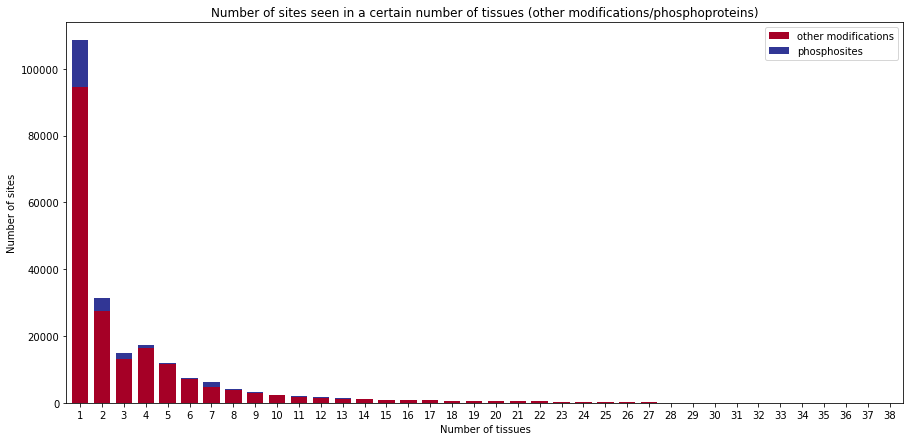

In [68]:
nr_tissues_expressed.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="RdYlBu",
                          title="Number of sites seen in a certain number of tissues (other modifications/phosphoproteins)",
                          xlabel= "Number of tissues", ylabel="Number of sites", width=0.75)

In [69]:
nr_tissues_expressed["log(other modifications)"] = np.log10(nr_tissues_expressed["other modifications"])
nr_tissues_expressed["log(phosphosites)"] = np.log10(nr_tissues_expressed["phosphosites"])

<AxesSubplot:title={'center':'Number of sites seen in a certain number of tissues (other modifications/phosphosites)'}, xlabel='Number of tissues', ylabel='log(Number of sites)'>

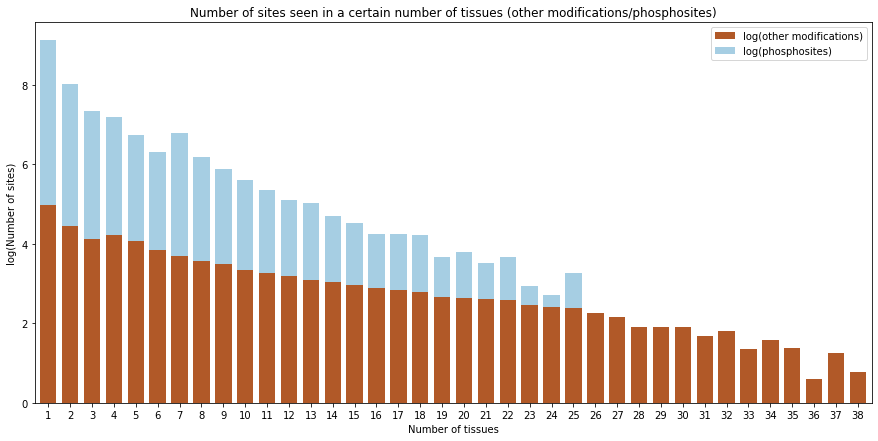

In [70]:
nr_tissues_expressed[["Number of tissues", "log(other modifications)", "log(phosphosites)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of sites seen in a certain number of tissues (other modifications/phosphosites)",
                          xlabel= "Number of tissues", ylabel="log(Number of sites)", width=0.75)
#plt.savefig("WP3 number tissues all_phosphosites.png", format="png", bbox_inches="tight")

In [71]:
nr_tissues_expressed

,Number of tissues,other modifications,phosphosites,log(other modifications),log(phosphosites)
0,1,94475,14019.0,4.975317,4.146717
1,2,27538,3831.0,4.439932,3.583312
2,3,13113,1682.0,4.117702,3.225826
3,4,16313,965.0,4.212534,2.984527
4,5,11529,466.0,4.061792,2.668386
5,6,7158,294.0,3.854792,2.468347
6,7,4854,1306.0,3.686100,3.115943
7,8,3791,404.0,3.578754,2.606381
8,9,3051,253.0,3.484442,2.403121
9,10,2260,178.0,3.354108,2.250420


In [72]:
data_all_mod_res_sub = pd.merge(data_Psite[["ACC_ID", "UP_POS"]], data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"])
data_all_mod_res_sub.head()

,ACC_ID,UP_POS,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,"PBMC,Lung,Synovial tissue,Liver,Blood,Blood,Me...",0,0,1,0,1,0,1,...,1,1,0,1,0,0,0,1,1,15
1,A0A075B6S5,52,"Lung,Lung,Lung,Lung,Blood,Menstrual fluid,Mens...",0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,9
2,A0A087WXM9,223,"Urinary bladder, Colon, Kidney, Liver,Blood",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
3,A0A0B4J2D5,124,"Liver,Liver,PBMC,PBMC,PBMC,Umbilical cord,Lung...",1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,16
4,A0A0B4J2D5,145,Liver,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
nr_tissues_expressed2 = data_all_mod_res_sub.groupby(["Total"], as_index=False)["ACC_ID"].count()
nr_tissues_expressed2.rename({"Total": "Number of tissues", "ACC_ID": "other modifications"}, axis=1, inplace=True)
nr_tissues_expressed2["phosphosites"]=data_Psite.groupby(["Total"], as_index=False)["ACC_ID"].count()["ACC_ID"]
nr_tissues_expressed2

,Number of tissues,other modifications,phosphosites
0,1,5497,14019.0
1,2,3849,3831.0
2,3,2094,1682.0
3,4,1342,965.0
4,5,1294,466.0
5,6,1027,294.0
6,7,785,1306.0
7,8,630,404.0
8,9,509,253.0
9,10,421,178.0


<AxesSubplot:title={'center':'Number of sites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated'}, xlabel='Number of tissues', ylabel='Number of sites'>

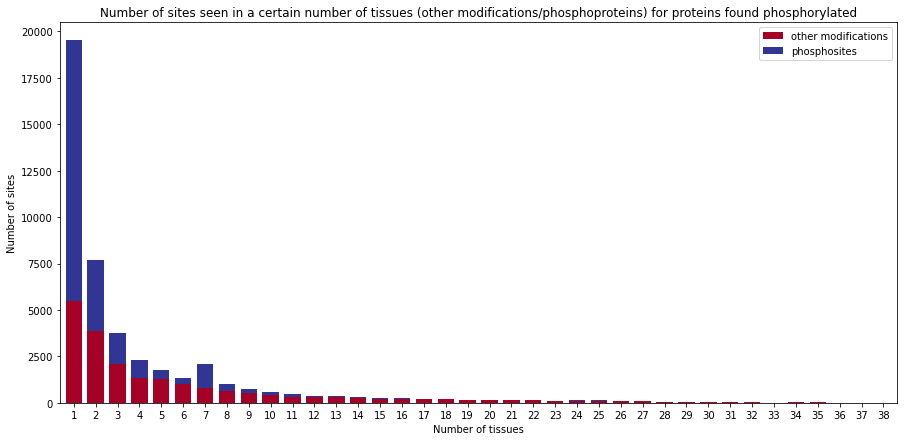

In [74]:
nr_tissues_expressed2.plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="RdYlBu",
                          title="Number of sites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated",
                          xlabel= "Number of tissues", ylabel="Number of sites", width=0.75)

In [75]:
nr_tissues_expressed2["log(other modifications)"] = np.log10(nr_tissues_expressed2["other modifications"])
nr_tissues_expressed2["log(phosphosites)"] = np.log10(nr_tissues_expressed2["phosphosites"])

<AxesSubplot:title={'center':'Number of phosphosites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated'}, xlabel='Number of tissues', ylabel='log(Number of sites)'>

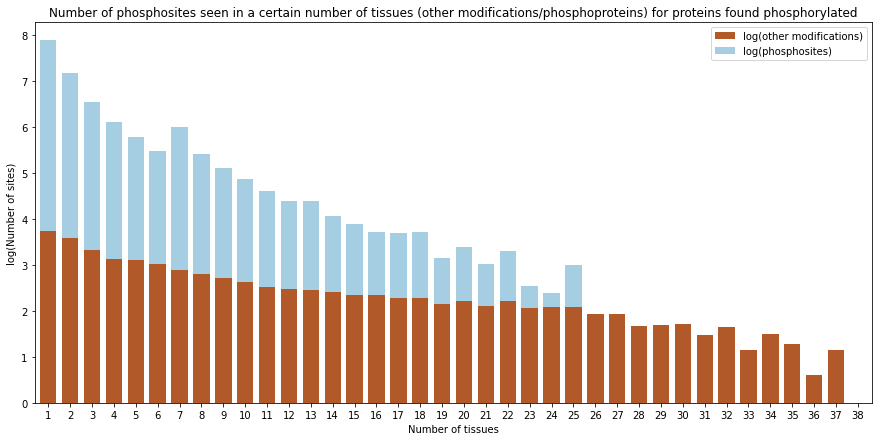

In [76]:
nr_tissues_expressed2[["Number of tissues", "log(other modifications)", "log(phosphosites)"]].plot(kind="bar", x="Number of tissues", stacked=True, rot=0, figsize=(15,7), colormap="Paired_r",
                          title="Number of phosphosites seen in a certain number of tissues (other modifications/phosphoproteins) for proteins found phosphorylated",
                          xlabel= "Number of tissues", ylabel="log(Number of sites)", width=0.75)
#plt.savefig("WP3 number tissues sites.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'sites having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

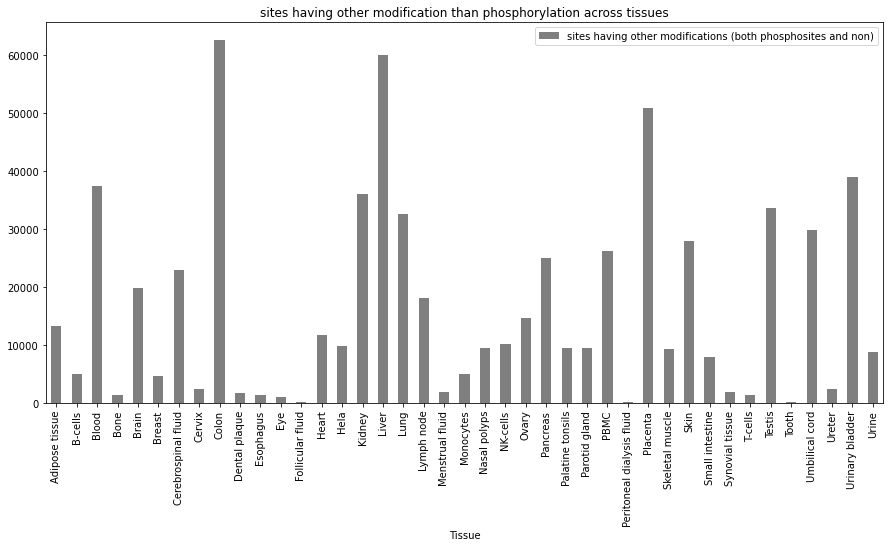

In [77]:
data_all_mod_sites_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_res[tissue].sum()
    list_counts.append(count)
data_all_mod_sites_tissues["sites having other modifications (both phosphosites and non)"] = list_counts
data_all_mod_sites_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="sites having other modification than phosphorylation across tissues", color="tab:grey")

<AxesSubplot:title={'center':'sites having other modification than phosphorylation across tissues'}, xlabel='Tissue'>

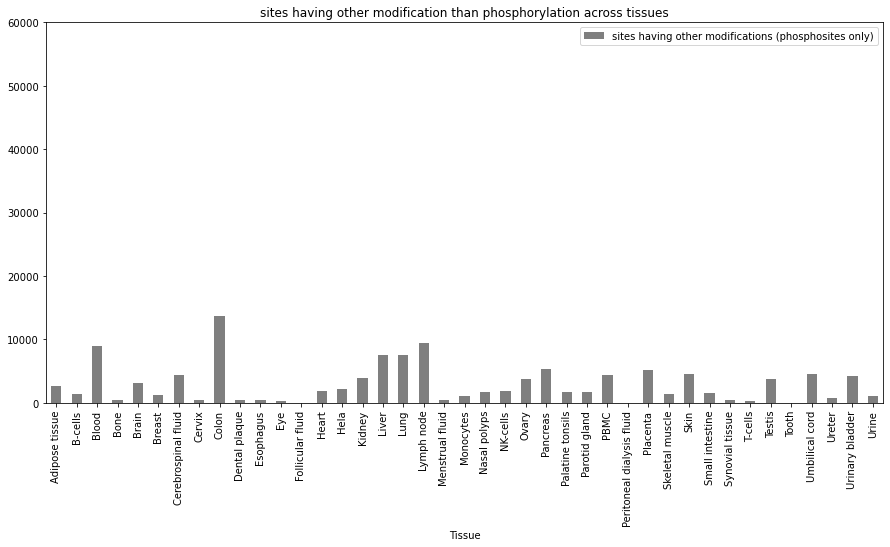

In [78]:
data_all_mod_sites_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    count = data_all_mod_res_sub[tissue].sum()
    list_counts.append(count)
data_all_mod_sites_tissues["sites having other modifications (phosphosites only)"] = list_counts
data_all_mod_sites_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="sites having other modification than phosphorylation across tissues", color="tab:grey", ylim=[0,60000])

In [79]:
list_counts = []
for tissue in list_tissues_STY:
    count = data_Psite.loc[(data_Psite[tissue]==1), "ACC_ID"].count()
    list_counts.append(count)
data_all_mod_sites_tissues["sites phosphorylated"] = list_counts

<AxesSubplot:title={'center':'Amount of phosphosites phosphorylated and otherwise modified'}, xlabel='Tissue'>

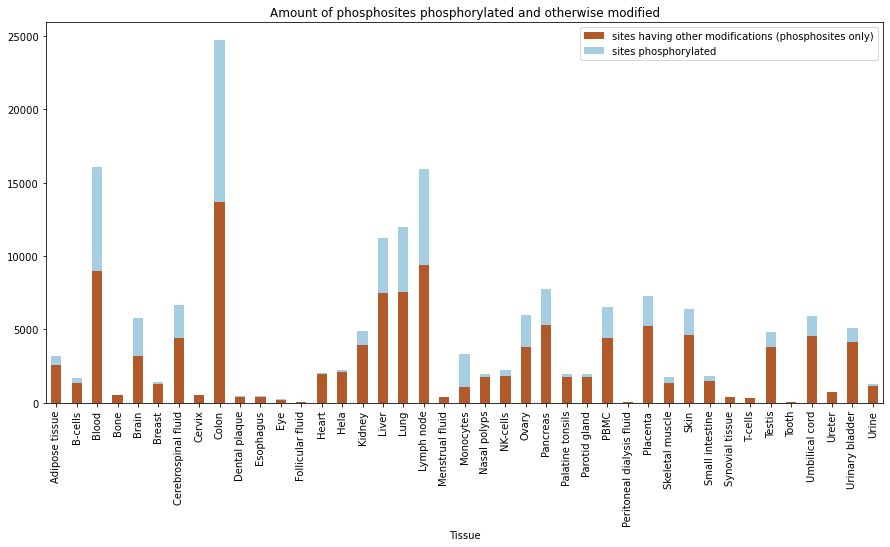

In [80]:
data_all_mod_sites_tissues.plot(x="Tissue", kind="bar", stacked=True, figsize=(15,7), title="Amount of phosphosites phosphorylated and otherwise modified", colormap="Paired_r")
#plt.savefig("WP3 phosphosites and otherwise modified per tissue.png", format="png", bbox_inches="tight")

In [81]:
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
taspec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
gen_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [82]:
tspec_sites_all_mod = pd.merge(tspec_sites, data_all_mod_res_sub, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"])
print(tspec_sites_all_mod.shape[0])
print("Tissue-specific Psites not found modified: {}".format(tspec_sites["ACC_ID"].count()-tspec_sites_all_mod["ACC_ID"].count()))
tspec_sites_all_mod.head() #18,35%

11445
Tissue-specific Psites not found modified: 2574


,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Small intestine_all_mod,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,1,15
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,9
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,16
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
print(taspec_sites.shape[0])

6478


In [84]:
taspec_sites_all_mod = pd.merge(taspec_sites, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"])
print(taspec_sites_all_mod.shape[0])
print("Tissue aspecific Psites not found modified: {}".format(taspec_sites["ACC_ID"].count()-taspec_sites_all_mod["ACC_ID"].count()))
taspec_sites_all_mod.head() # 3,47%

6253
Tissue aspecific Psites not found modified: 225


,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Small intestine_all_mod,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod
0,A0A0C4DH36,108,"Lung,Blood,Blood",T,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,A0AVK6,102,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [85]:
gen_sites_all_mod = pd.merge(gen_sites, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"])
print(gen_sites_all_mod.shape[0])
print("Pervasive Psites not found modified: {}".format(gen_sites["ACC_ID"].count()-gen_sites_all_mod["ACC_ID"].count()))
gen_sites_all_mod.head() # 6,11%

3198
Pervasive Psites not found modified: 208


,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Small intestine_all_mod,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod
0,A0A0C4DH39,51,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,5
1,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
2,A2RU30,454,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,A5A3E0,939,"Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...",S,0,0,1,0,1,0,...,1,1,1,1,0,1,1,1,1,35
4,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,1,0,1,1,0,1,1,1,1,37


In [86]:
gen_all_mod_not = pd.merge(gen_sites, data_all_mod_res, how="left", on=["ACC_ID", "UP_POS"], suffixes=["_P", "_all_mod"], indicator = True)
gen_all_mod_not[gen_all_mod_not["_merge"]=="left_only"]["Total_P"]

7       7
8       7
9       7
12      7
28      7
       ..
3313    7
3380    7
3381    7
3385    7
3402    7
Name: Total_P, Length: 208, dtype: int64

In [87]:
gen_all_mod_not[(gen_all_mod_not["_merge"]=="left_only")&(gen_all_mod_not["Total_P"]!=7)]["Total_P"]

33      5
225     5
644     8
809     8
843     6
1120    5
1691    8
1912    8
2406    6
2505    9
2644    8
2752    5
Name: Total_P, dtype: int64

In [88]:
tspec_sites_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    if tissue not in ["Bronchoalveolar lavage", "Cartilage", "Sputum"]:
        tissueP = tissue+"_P"
        tissue_all_mod = tissue+"_all_mod"
        tspec_sites_all_mod.loc[(tspec_sites_all_mod[tissueP]==0)&(tspec_sites_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
    else:
        tissue_all_mod = tissue
        tspec_sites_all_mod.loc[(tspec_sites_all_mod[tissue_all_mod]), "Total_nonP"] += 1
tspec_sites_all_mod.head()

,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,15,14
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,9,8
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,5,5
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,16,15
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [89]:
tspec_sites_all_mod[tspec_sites_all_mod["Total_nonP"] <= tspec_sites_all_mod["Total_all_mod"]]["ACC_ID"].count()

11445

In [90]:
print(tspec_sites_all_mod.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

11445


In [91]:
taspec_sites_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    taspec_sites_all_mod.loc[(taspec_sites_all_mod[tissueP]==0)&(taspec_sites_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
taspec_sites_all_mod.head()

,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
0,A0A0C4DH36,108,"Lung,Blood,Blood",T,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,5
1,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,A0AVK6,102,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5,2
4,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,1


In [92]:
taspec_all_mod[taspec_all_mod["Total_nonP"] <= taspec_all_mod["Total_all_mod"]]["ACC_ID"].count()

2068

In [93]:
gen_sites_all_mod["Total_nonP"] = 0
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_sites_all_mod.loc[(gen_sites_all_mod[tissueP]==0)&(gen_sites_all_mod[tissue_all_mod]==1), "Total_nonP"] += 1
gen_sites_all_mod.head()

,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
0,A0A0C4DH39,51,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,5,0
1,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,2,1
2,A2RU30,454,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,A5A3E0,939,"Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...",S,0,0,1,0,1,0,...,1,1,1,0,1,1,1,1,35,24
4,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,0,1,1,0,1,1,1,1,37,24


In [94]:
gen_sites_all_mod[gen_sites_all_mod["Total_nonP"] < gen_sites_all_mod["Total_all_mod"]]["ACC_ID"].count()

3118

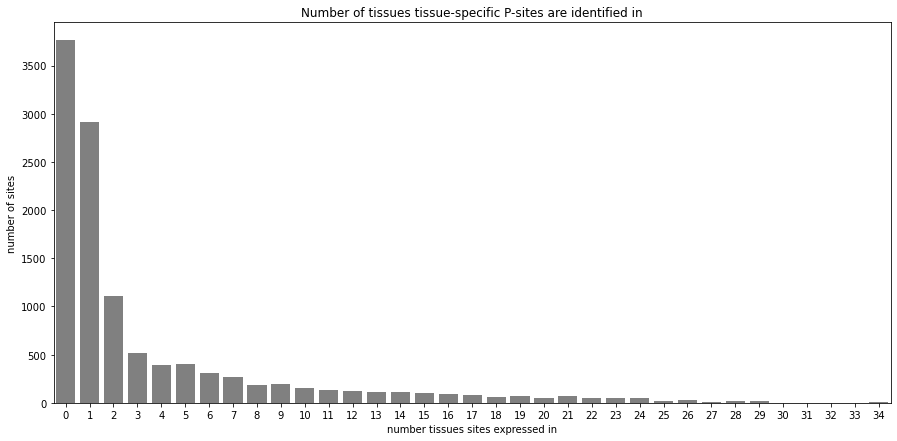

In [95]:
plot = tspec_sites_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues tissue-specific P-sites are identified in")
#plt.savefig("WP3 tissue specific sites modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [96]:
plot

,Total_nonP,ACC_ID
0,0,3761
1,1,2912
2,2,1107
3,3,517
4,4,394
5,5,405
6,6,306
7,7,268
8,8,181
9,9,200


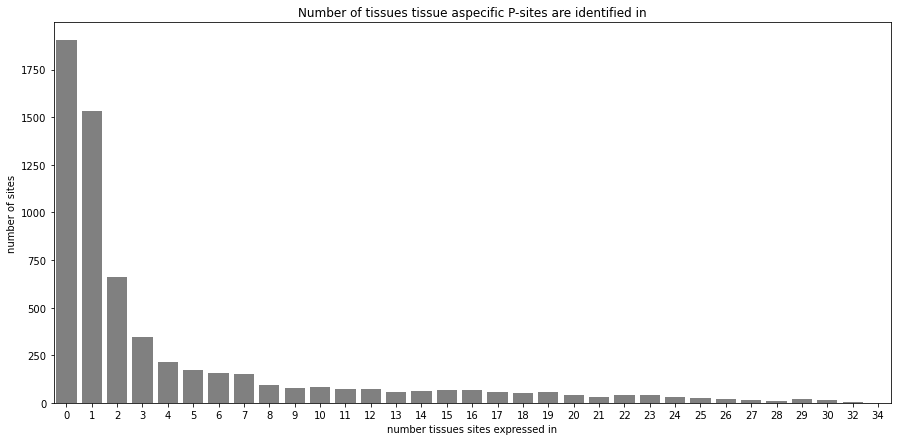

In [97]:
plot = taspec_sites_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues tissue aspecific P-sites are identified in")
#plt.savefig("WP3 tissue aspecific sites modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [98]:
plot

,Total_nonP,ACC_ID
0,0,1903
1,1,1532
2,2,663
3,3,347
4,4,213
5,5,173
6,6,156
7,7,152
8,8,95
9,9,79


In [99]:
print(plot["ACC_ID"].sum())

6253


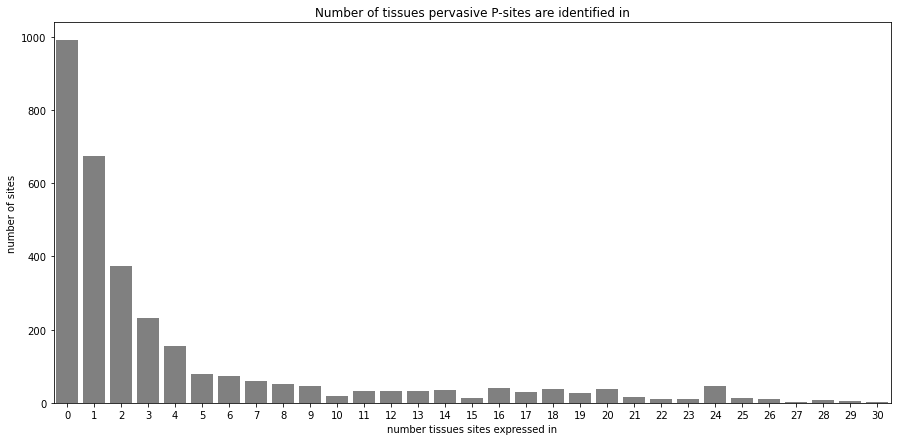

In [100]:
plot = gen_sites_all_mod.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues pervasive P-sites are identified in")
#plt.savefig("WP3 pervasive sites modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [101]:
plot

,Total_nonP,ACC_ID
0,0,990
1,1,675
2,2,375
3,3,233
4,4,155
5,5,78
6,6,74
7,7,60
8,8,52
9,9,47


In [102]:
gen_sites_all_mod_10 = gen_sites_all_mod[gen_sites_all_mod["Total_P"]>=10]
print(gen_sites[gen_sites["Total"]>=10]["ACC_ID"].count())
print(gen_sites_all_mod_10.shape[0])
gen_sites_all_mod_10.head()

683
683


,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
3,A5A3E0,939,"Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...",S,0,0,1,0,1,0,...,1,1,1,0,1,1,1,1,35,24
4,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,0,1,1,0,1,1,1,1,37,24
5,A5A3E0,971,"Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...",S,0,0,1,0,1,0,...,1,0,1,0,1,1,1,1,31,16
11,A6NMY6,19,"Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...",T,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,18,9
28,B5ME19,39,"Umbilical cord,Umbilical cord,Umbilical cord,U...",S,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,14,2


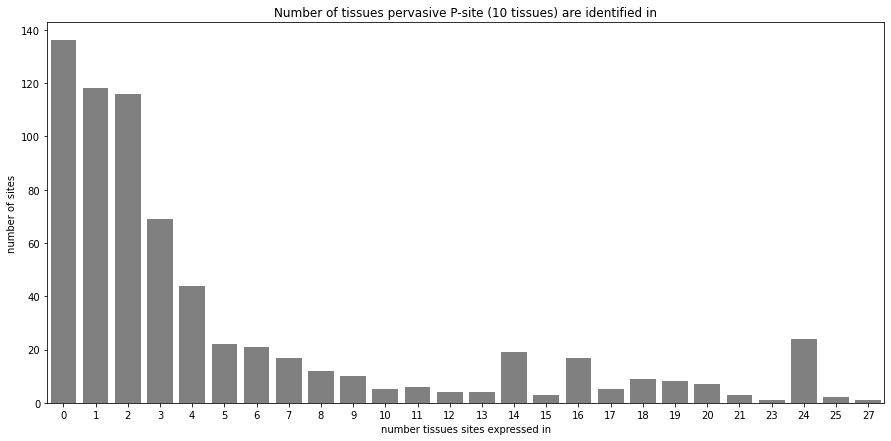

In [103]:
plot = gen_sites_all_mod_10.groupby(["Total_nonP"], as_index=False)["ACC_ID"].count()
plt.figure(figsize=(15,7))
sns.barplot(x=plot["Total_nonP"],
            y=plot["ACC_ID"], color="grey").set(xlabel="number tissues sites expressed in",
                                                  ylabel = "number of sites", title = "Number of tissues pervasive P-site (10 tissues) are identified in")
#plt.savefig("WP3 pervasive sites_10plus modified in other tissues.png", format="png", bbox_inches="tight")
plt.show()

In [104]:
plot

,Total_nonP,ACC_ID
0,0,136
1,1,118
2,2,116
3,3,69
4,4,44
5,5,22
6,6,21
7,7,17
8,8,12
9,9,10


In [105]:
plot["ACC_ID"].sum()

683

In [106]:
gen_sites_all_mod_10_mod = gen_sites_all_mod_10.copy()
for tissue in list_tissues_STY:
    tissueP = tissue+"_P"
    tissue_all_mod = tissue+"_all_mod"
    gen_sites_all_mod_10_mod.loc[(gen_sites_all_mod_10_mod[tissueP]==1)&(gen_sites_all_mod_10_mod[tissue_all_mod]==1), tissue_all_mod] = 0
gen_sites_all_mod_10_mod

,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
3,A5A3E0,939,"Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...",S,0,0,1,0,1,0,...,1,1,1,0,1,1,1,1,35,24
4,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,0,1,0,0,0,1,1,1,37,24
5,A5A3E0,971,"Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...",S,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,31,16
11,A6NMY6,19,"Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...",T,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,18,9
28,B5ME19,39,"Umbilical cord,Umbilical cord,Umbilical cord,U...",S,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,Q9Y4F5,360,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,7,0
3165,Q9Y5S2,1690,"Liver,Liver,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,10,1
3171,Q9Y6G9,207,"Liver,Liver,Liver,Liver,Liver,Liver,Liver,Live...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,10,0
3173,Q9Y6G9,515,"Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBM...",T,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,9,1


In [107]:
print(gen_sites_all_mod_10_mod.shape[0])
print(gen_sites_all_mod_10_mod[gen_sites_all_mod_10_mod["Total_nonP"]>2].shape[0])

683
313


<AxesSubplot:title={'center':'Number of phosphoproteins having modifications other than phopshorylation'}, xlabel='Tissue'>

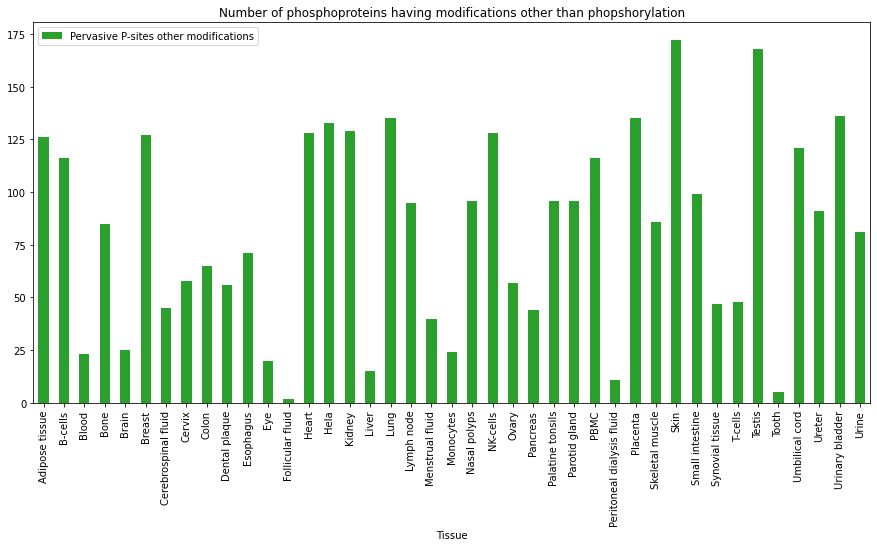

In [108]:
df_gen_all_mod_10_mod_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts = []
for tissue in list_tissues_STY:
    tissue = tissue+"_all_mod"
    count = gen_sites_all_mod_10_mod[tissue].sum()
    list_counts.append(count)
df_gen_all_mod_10_mod_tissues["Pervasive P-sites other modifications"] = list_counts
df_gen_all_mod_10_mod_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphoproteins having modifications other than phopshorylation", color="tab:green")
#plt.savefig("WP3 pervasive sites_10plus other mods distribution across tissues.png", format="png", bbox_inches="tight")

In [109]:
gen_sites_all_mod_10[gen_sites_all_mod_10["Total_nonP"]==0]

,ACC_ID,UP_POS,tissue_P,modres,Adipose tissue_P,B-cells_P,Blood_P,Bone_P,Brain_P,Breast_P,...,Synovial tissue_all_mod,T-cells_all_mod,Testis_all_mod,Tooth_all_mod,Umbilical cord_all_mod,Ureter_all_mod,Urinary bladder_all_mod,Urine_all_mod,Total_all_mod,Total_nonP
51,O00264,181,"Liver,Liver,Liver,Liver,Liver,Liver,Liver,Brea...",S,1,0,1,0,1,1,...,0,0,1,0,1,0,1,0,22,0
87,O14639,452,"PBMC,PBMC,Blood,Colon,Colon,Colon,Colon,Colon,...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,9,0
137,O43166,1585,"Skin,Lung,Lung,Colon,Colon,Colon,Colon,Colon,C...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,7,0
237,O75382,7,"Blood,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,7,0
247,O75508,196,"Brain,Brain,Brain,Umbilical cord,Brain,Brain,B...",S,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,Q9Y2W1,682,"Liver,Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PB...",S,1,1,1,0,1,0,...,0,0,0,0,1,0,1,0,17,0
3144,Q9Y4B6,1000,"Blood,Blood,Blood,Blood,Blood,Blood,Blood,Bloo...",S,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,9,0
3152,Q9Y4F5,360,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,7,0
3171,Q9Y6G9,207,"Liver,Liver,Liver,Liver,Liver,Liver,Liver,Live...",S,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,10,0


In [110]:
gen_sites_all_mod_10["Total_nonP"].value_counts()

0     136
1     118
2     116
3      69
4      44
24     24
5      22
6      21
14     19
7      17
16     17
8      12
9      10
18      9
19      8
20      7
11      6
10      5
17      5
12      4
13      4
15      3
21      3
25      2
23      1
27      1
Name: Total_nonP, dtype: int64

## Comparison of the frequency of identification

In [111]:
data_all_mod

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional
0,PXD000004,AEVMADTAVALASGNVK,T,2034,P21359,2028,2044,447,[447]Deoxy,Brain,None,None,None,None
1,PXD000004,DMGEMVTQGQTDAQYMFLR,T,1129,Q01082,1123,1141,4,[4]Carbamidomethyl,Brain,None,None,None,None
2,PXD000004,GGPNTVTPPPTTPEWVK,T,87,Q13733,83,99,1,[1]Acetyl,Brain,None,None,None,None
3,PXD000004,QVSSLLTNHLAR,S,1357,Q9Y4D8,1355,1366,385,[385]Ammonia-loss,Brain,None,None,None,None
4,PXD000004,ITFTPSSGIASEVTVPK,S,728,Q92752,718,734,327,[327]Delta:H(4)C(2)O(-1)S(1),Brain,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049439,PXD011609,TASTNNIAQAR,T,5,Q9UBI6,5,15,4,[4]Carbamidomethyl,Skin,None,None,None,None
4049440,PXD011609,QGSYHEQSVDR,S,1503,P20930,1501,1511,385,[385]Ammonia-loss,Skin,None,None,None,None
4049441,PXD011609,HSGTGHGQASSAVR,T,725,P20930,722,735,426,[426]Octanoyl,Skin,None,None,None,None
4049442,PXD011609,SPEDLER,S,283,Q8N196,283,289,4,[4]Carbamidomethyl,Skin,None,None,None,None


In [112]:
data_P = pd.read_csv("phospho_data_tissue_annotation_enrichment1.txt", sep="\t")
data_P.dropna(axis=0, subset=["tissue"], inplace=True)
data_P

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,tissue,enrichment,modification,method,additional
0,PXD000004,RPPSPEPSTK,S,2102,Q01082,2099,2108,Brain,None,None,None,None
1,PXD000004,ACVVHGSDLK,C,660,P50993,659,668,Brain,None,None,None,None
2,PXD000004,ACVVHGSDLK,C,663,P05023,662,671,Brain,None,None,None,None
3,PXD000004,AISPTSATSSGR,S,600,Q9Y4I1,598,609,Brain,None,None,None,None
4,PXD000004,FYYTAGSSSPTHAK,S,198,O75508,190,203,Brain,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
646011,PXD011609,SFSTASAITPSVSR,S,18,P13647,16,29,Skin,None,None,None,None
646012,PXD011609,SGGGFSSGSAGIINYQR,S,21,P04264,13,29,Skin,None,None,None,None
646013,PXD011609,SGGGFSSGSAGIINYQR,S,21,P04264,13,29,Skin,None,None,None,None
646014,PXD011609,SGGGFSSGSAGIINYQR,S,19,P04264,13,29,Skin,None,None,None,None


In [113]:
tspec_sites_allP = pd.merge(data_P, tspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
tspec_sites_allP

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,tissue,enrichment,modification,method,additional
0,PXD000004,LTCQVEHDGQPAVSK,T,329,Q5TFQ8,328,342,Brain,None,None,None,None
1,PXD000004,LTCQVEHDGQPAVSK,T,330,P78324,329,343,Brain,None,None,None,None
2,PXD000004,NDGGIYTCFAENNR,Y,482,Q12860,477,490,Brain,None,None,None,None
3,PXD000004,ALAIEDRFVYIAAR,Y,505,Q9NVR0,496,509,Brain,None,None,None,None
4,PXD000004,CTELNQAWSSLGK,T,1315,Q13813,1314,1326,Brain,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
63090,PXD011609,AIGGGLSSVGGGSSTIK,S,547,P02538,534,550,Skin,None,None,None,None
63091,PXD011609,AIGGGLSSVGGGSSTIK,S,547,P48668,534,550,Skin,None,None,None,None
63092,PXD011609,GLGVGFGSGGGSSSSVK,S,571,P13647,560,576,Skin,None,None,None,None
63093,PXD011609,GGGFGGGSSFGGGSGFSGGGFGGGGFGGGR,S,106,P35908,93,122,Skin,None,None,None,None


In [114]:
tspec_sites_allP_freq = tspec_sites_allP.groupby(["ACC_ID", "UP_POS"], as_index=False)["proj"].count()
tspec_sites_allP_freq

,ACC_ID,UP_POS,proj
0,A0A075B6H7,30,1
1,A0A075B6S5,52,1
2,A0A087WXM9,223,1
3,A0A0B4J2D5,124,1
4,A0A0B4J2D5,145,1
...,...,...,...
14014,Q9Y6Y0,326,2
14015,Q9Y6Y0,336,1
14016,Q9Y6Y0,338,45
14017,Q9Y6Y8,737,1


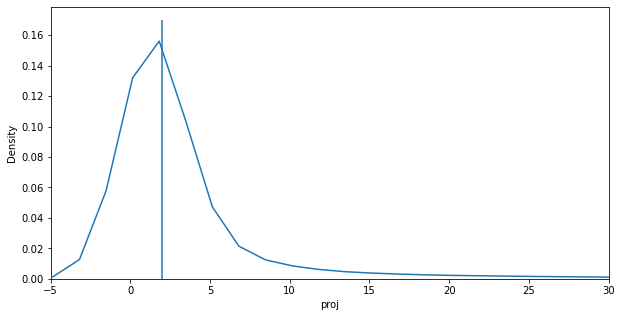

In [115]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-5,30])
plt.vlines(x=2, ymin=0, ymax=0.17)

plt.show()

In [116]:
tspec_sites_othermod = pd.merge(data_all_mod, tspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
tspec_sites_othermod

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional
0,PXD000004,CVEDPETGLCLLPLTDK,T,3014,Q15149,3008,3024,401,[401]Didehydro,Brain,None,None,None,None
1,PXD000004,CVEDPETGLCLLPLTDK,T,3014,Q15149,3008,3024,401,[401]Didehydro,Brain,None,None,None,None
2,PXD000004,CVEDPETGLCLLPLTDK,T,3014,Q15149,3008,3024,401,[401]Didehydro,Brain,None,None,None,None
3,PXD000004,CVEDPETGLCLLPLTDK,T,3014,Q15149,3008,3024,401,[401]Didehydro,Brain,None,None,None,None
4,PXD000004,CVEDPETGLCLLPLTDK,T,3014,Q15149,3008,3024,401,[401]Didehydro,Brain,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488915,PXD011609,SSSDHHFNQTIGSASPSTAR,S,1031,Q02413,1017,1036,40,[40]Sulfo,Skin,None,None,None,None
488916,PXD011609,SSSDHHFNQTIGSASPSTAR,S,1031,Q02413,1017,1036,40,[40]Sulfo,Skin,None,None,None,None
488917,PXD011609,HSASQEGQDTIR,S,509,P20930,506,517,40,[40]Sulfo,Skin,None,None,None,None
488918,PXD011609,HSASQEGQDTIR,S,509,P20930,506,517,1426,[1426]Hex(1)Pent(1),Skin,None,None,None,None


In [117]:
tspec_sites_othermod_freq = tspec_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification"],as_index=False)["proj"].count()
tspec_sites_othermod_freq

,ACC_ID,UP_POS,modification,proj
0,A0A075B6H7,30,[122]Formyl,3
1,A0A075B6H7,30,[1419]15N-oxobutanoic,7
2,A0A075B6H7,30,[2007]Methamidophos-S,1
3,A0A075B6H7,30,[23]Dehydrated,6
4,A0A075B6H7,30,[35]Oxidation,1
...,...,...,...,...
46836,Q9Y6Y0,338,[40]Sulfo,204
46837,Q9Y6Y0,338,[447]Deoxy,1
46838,Q9Y6Y8,737,[40]Sulfo,2
46839,Q9Y6Y8,926,[40]Sulfo,26


In [118]:
tspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     9177
[4]Carbamidomethyl            2400
[472]AEC-MAEC                 1662
[122]Formyl                   1579
[35]Oxidation                 1567
                              ... 
[417]PhosphoUridine              7
[292]IodoU-AMP                   6
[1801]Fluorescein-tyramine       5
[534]Dibromo                     4
[131]Triiodo                     1
Name: modification, Length: 132, dtype: int64

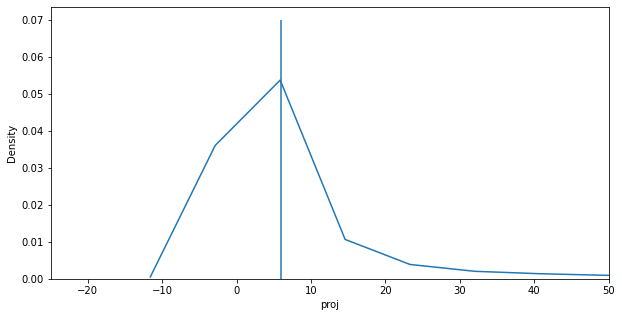

In [119]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_othermod_freq["proj"])
plt.xlim([-25,50])
plt.vlines(x=6, ymin=0, ymax=0.07)

plt.show()

In [120]:
tspec_sites_othermod_freq_gr = tspec_sites_othermod_freq.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "mean"
                                                                                                              })
tspec_sites_othermod_freq_gr

,ACC_ID,UP_POS,proj
0,A0A075B6H7,30,4.400000
1,A0A075B6S5,52,10.131579
2,A0A087WXM9,223,1.000000
3,A0A0B4J2D5,124,3.692308
4,A0A0B4J2D5,145,1.000000
...,...,...,...
11440,Q9Y6X9,615,6.000000
11441,Q9Y6Y0,336,12.500000
11442,Q9Y6Y0,338,69.000000
11443,Q9Y6Y8,737,2.000000


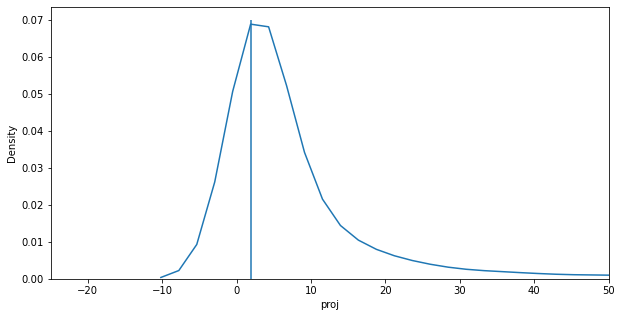

In [121]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_othermod_freq_gr["proj"])
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.07)

plt.show()

In [122]:
tspec_sites_comb_freq = pd.merge(tspec_sites_othermod_freq_gr, tspec_sites_allP_freq, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_othermod", "_P"])

In [123]:
print(tspec_sites_comb_freq.shape[0])
print(tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]].shape[0])
print(tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]].shape[0]*100/tspec_sites.shape[0])
print(tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]].shape[0]*100/tspec_sites_comb_freq.shape[0])
tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]]

11445
3796
27.077537627505528
33.16732197466143


,ACC_ID,UP_POS,proj_othermod,proj_P
2,A0A087WXM9,223,1.000000,1
4,A0A0B4J2D5,145,1.000000,1
5,A0A0B4J2D9,52,2.217391,3
15,A0A1B0GTU1,762,1.000000,2
16,A0A1B0GTU1,763,1.000000,2
...,...,...,...,...
11425,Q9Y6Q9,867,1.000000,1
11426,Q9Y6R1,239,2.000000,2
11430,Q9Y6R7,5062,6.000000,20
11438,Q9Y6X4,526,2.000000,3


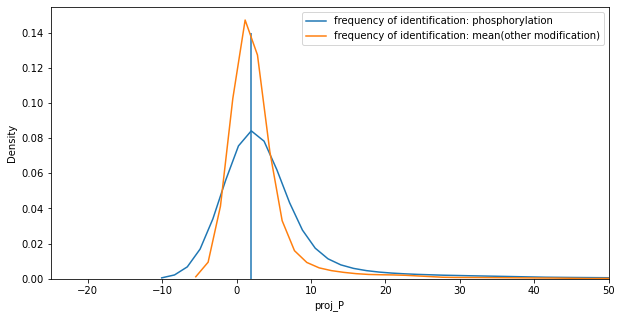

In [124]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]<=tspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: mean(other modification)")
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

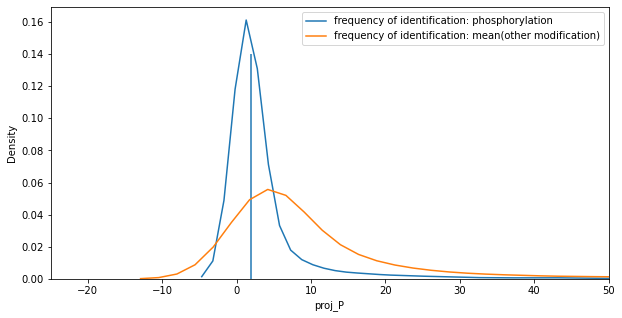

In [125]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]>tspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=tspec_sites_comb_freq[tspec_sites_comb_freq["proj_othermod"]>tspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: mean(other modification)")
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.14)
plt.legend()

plt.show()

In [126]:
taspec_sites_allP = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], data_P, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_allP

,ACC_ID,UP_POS,proj,peptide,modres,pep_start,pep_end,tissue,enrichment,modification,method,additional
0,A0A0C4DH36,108,PXD004682,AEGTAVYYCAR,T,105,115,Lung,None,None,None,None
1,A0A0C4DH36,108,PXD009029,AEGTAVYYCAR,T,105,115,Blood,None,None,None,None
2,A0A0C4DH36,108,PXD009029,AEGTAVYYCAR,T,105,115,Blood,None,None,None,None
3,A0AVK6,71,PXD006581,MLISAVSPEIR,S,65,75,Blood,Yes,Phosphorylation,IMAC,Fe-NTA loaded beads
4,A0AVK6,71,PXD007740,MLISAVSPEIR,S,65,75,Colon,Yes,Phosphorylation,IMAC,GELoader tips (Ti4+)
...,...,...,...,...,...,...,...,...,...,...,...,...
130552,Q9Y6X9,743,PXD007740,RSVAVSDEEEVEEEAER,S,738,754,Colon,Yes,Phosphorylation,IMAC,GELoader tips (Ti4+)
130553,Q9Y6X9,743,PXD007740,SVAVSDEEEVEEEAERRK,S,739,756,Colon,Yes,Phosphorylation,IMAC,GELoader tips (Ti4+)
130554,Q9Y6X9,743,PXD010630,SVAVSDEEEVEEEAER,S,739,754,Placenta,None,None,None,None
130555,Q9Y6X9,743,PXD010630,SVAVSDEEEVEEEAER,S,739,754,Placenta,None,None,None,None


In [127]:
taspec_sites_allP_freq = taspec_sites_allP.groupby(["ACC_ID", "UP_POS"], as_index=False)["proj"].count()
taspec_sites_allP_freq

,ACC_ID,UP_POS,proj
0,A0A0C4DH36,108,3
1,A0AVK6,71,6
2,A0AVK6,102,7
3,A0FGR8,738,11
4,A0FGR8,739,7
...,...,...,...
6473,Q9Y6Q9,1330,9
6474,Q9Y6R1,245,43
6475,Q9Y6R9,285,2
6476,Q9Y6X9,725,9


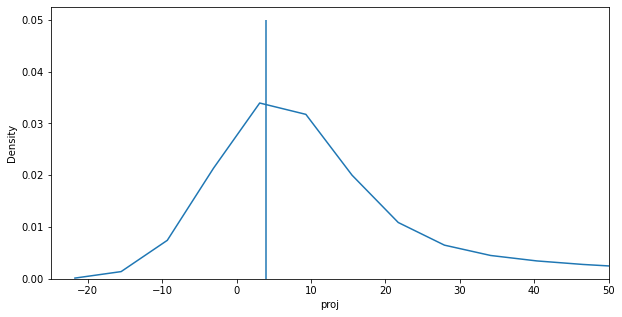

In [128]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.05)

plt.show()

In [129]:
taspec_sites_othermod = pd.merge(data_all_mod, taspec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_othermod

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional
0,PXD000004,GSSGGGCFGGSSGGYGGLGGFGGGSFR,S,61,P13645,60,86,4,[4]Carbamidomethyl,Brain,None,None,None,None
1,PXD001324,GSSGGGCFGGSSGGYGGLGGFGGGSFR,S,61,P13645,60,86,4,[4]Carbamidomethyl,Breast,None,None,None,None
2,PXD001324,GSSGGGCFGGSSGGYGGLGGFGGGSFR,S,61,P13645,60,86,4,[4]Carbamidomethyl,Breast,None,None,None,None
3,PXD001324,GSSGGGCFGGSSGGYGGLGGFGGGSFR,S,61,P13645,60,86,977,[977]Carbofuran,Breast,None,None,None,None
4,PXD001325,GSSGGGCFGGSSGGYGGLGGFGGGSFR,S,61,P13645,60,86,977,[977]Carbofuran,Breast,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676878,PXD011492,HSASQEGQDTIR,S,507,P20930,506,517,4,[4]Carbamidomethyl,Skin,None,None,None,None
676879,PXD011492,HSASQEGQDTIR,S,507,P20930,506,517,4,[4]Carbamidomethyl,Skin,None,None,None,None
676880,PXD011609,HSASQEGQDTIR,S,507,P20930,506,517,1426,[1426]Hex(1)Pent(1),Skin,None,None,None,None
676881,PXD011609,HSASQEGQDTIR,S,507,P20930,506,517,4,[4]Carbamidomethyl,Skin,None,None,None,None


In [130]:
taspec_sites_othermod_freq = taspec_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification"],as_index=False)["proj"].count()
taspec_sites_othermod_freq

,ACC_ID,UP_POS,modification,proj
0,A0A0C4DH36,108,[122]Formyl,11
1,A0A0C4DH36,108,[5]Carbamyl,1
2,A0AVK6,71,[40]Sulfo,30
3,A0AVK6,102,[40]Sulfo,27
4,A0FGR8,738,[385]Ammonia-loss,1
...,...,...,...,...
32845,Q9Y6X9,725,[40]Sulfo,6
32846,Q9Y6X9,725,[898]pyrophospho,2
32847,Q9Y6X9,743,[1429]Hex(1)HexNAc(1)Phos(1),2
32848,Q9Y6X9,743,[1430]Hex(1)HexNAc(1)Sulf(1),1


In [131]:
taspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     5898
[4]Carbamidomethyl            1295
[35]Oxidation                  957
[122]Formyl                    937
[5]Carbamyl                    912
                              ... 
[417]PhosphoUridine              8
[1801]Fluorescein-tyramine       5
[534]Dibromo                     3
[131]Triiodo                     1
[397]Triiodothyronine            1
Name: modification, Length: 133, dtype: int64

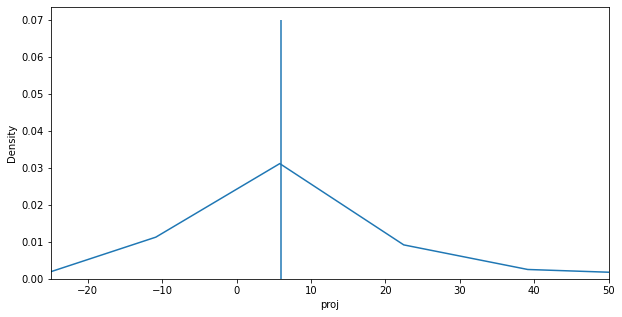

In [132]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_othermod_freq["proj"])
plt.xlim([-25,50])
plt.vlines(x=6, ymin=0, ymax=0.07)

plt.show()

In [133]:
taspec_sites_othermod_freq_gr = taspec_sites_othermod_freq.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "mean"
                                                                                                              })
taspec_sites_othermod_freq_gr

,ACC_ID,UP_POS,proj
0,A0A0C4DH36,108,6.000000
1,A0AVK6,71,30.000000
2,A0AVK6,102,27.000000
3,A0FGR8,738,8.500000
4,A0FGR8,739,14.000000
...,...,...,...
6248,Q9Y6Q9,1330,2.000000
6249,Q9Y6R1,245,26.666667
6250,Q9Y6R9,285,3.000000
6251,Q9Y6X9,725,4.000000


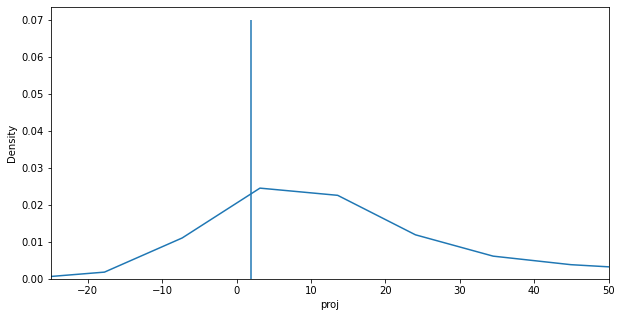

In [134]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_othermod_freq_gr["proj"])
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.07)

plt.show()

In [135]:
taspec_sites_comb_freq = pd.merge(taspec_sites_othermod_freq_gr, taspec_sites_allP_freq, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_othermod", "_P"])

In [136]:
print(taspec_sites_comb_freq.shape[0])

6253


In [137]:
print(pd.merge(taspec_sites_othermod_freq_gr, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"]).shape[0])

6253


In [139]:
print(taspec_sites_comb_freq.shape[0])
print(taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]].shape[0])
print(taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]].shape[0]*100/taspec_sites.shape[0])
print(taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]].shape[0]*100/taspec_sites_comb_freq.shape[0])
taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]]

6253
2736
42.23525779561593
43.754997601151445


,ACC_ID,UP_POS,proj_othermod,proj_P
3,A0FGR8,738,8.500000,11
9,A0MZ66,493,15.000000,15
10,A0MZ66,494,42.000000,67
11,A0MZ66,506,65.250000,77
13,A2RRP1,473,6.000000,13
...,...,...,...,...
6243,Q9Y6N7,940,2.000000,8
6248,Q9Y6Q9,1330,2.000000,9
6249,Q9Y6R1,245,26.666667,43
6251,Q9Y6X9,725,4.000000,9


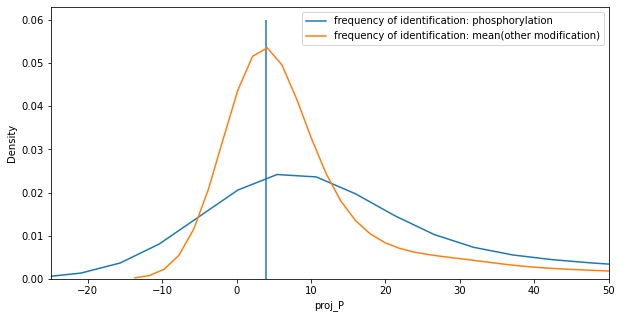

In [141]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]<=taspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: mean(other modification)")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.06)
plt.legend()

plt.show()

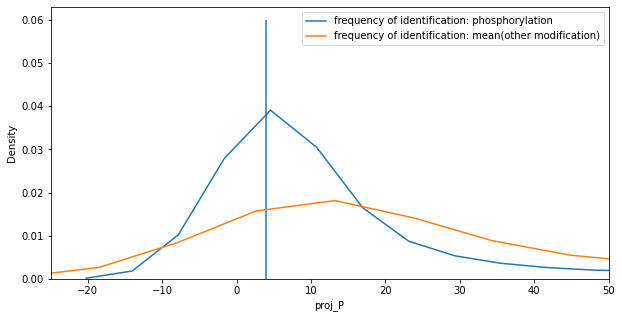

In [143]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]>taspec_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=taspec_sites_comb_freq[taspec_sites_comb_freq["proj_othermod"]>taspec_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: mean(other modification)")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.06)
plt.legend()

plt.show()

In [145]:
perv_sites_allP = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], data_P, how="inner", on=["ACC_ID", "UP_POS"])
perv_sites_allP

,ACC_ID,UP_POS,proj,peptide,modres,pep_start,pep_end,tissue,enrichment,modification,method,additional
0,A0A0C4DH39,51,PXD010271,ASGFTFTSSAVQWVR,S,43,57,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",None,None,None,None
1,A0JNW5,1402,PXD006581,SVTQATQTSPGVPWPSQSANFPEFSFDFTR,S,1394,1423,Blood,Yes,Phosphorylation,IMAC,Fe-NTA loaded beads
2,A0JNW5,1402,PXD006581,SVTQATQTSPGVPWPSQSANFPEFSFDFTR,S,1394,1423,Blood,Yes,Phosphorylation,IMAC,Fe-NTA loaded beads
3,A0JNW5,1402,PXD006581,SVTQATQTSPGVPWPSQSANFPEFSFDFTR,S,1394,1423,Blood,Yes,Phosphorylation,IMAC,Fe-NTA loaded beads
4,A0JNW5,1402,PXD010271,SVTQATQTSPGVPWPSQSANFPEFSFDFTR,S,1394,1423,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
183529,Q9Y6X4,635,PXD010271,AVDSSSEEIEVEVPVVDRR,S,632,650,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",None,None,None,None
183530,Q9Y6X4,635,PXD010271,AVDSSSEEIEVEVPVVDRR,S,632,650,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",None,None,None,None
183531,Q9Y6Y0,276,PXD006833,QISSSSTGCLSSPNATVQSPK,S,266,286,"Urinary bladder, Colon, Kidney, Liver",Yes,Low abundance proteins,ProteoMiner,"depletion of high abundance proteins, enrichme..."
183532,Q9Y6Y0,276,PXD007740,QISSSSTGCLSSPNATVQSPK,S,266,286,Colon,Yes,Phosphorylation,IMAC,GELoader tips (Ti4+)


In [146]:
perv_sites_allP_freq = perv_sites_allP.groupby(["ACC_ID", "UP_POS"], as_index=False)["proj"].count()
perv_sites_allP_freq

,ACC_ID,UP_POS,proj
0,A0A0C4DH39,51,1
1,A0JNW5,1402,7
2,A2RU30,454,2
3,A5A3E0,939,44
4,A5A3E0,940,26
...,...,...,...
3401,Q9Y6V0,4023,2
3402,Q9Y6V0,4024,2
3403,Q9Y6V0,4395,1
3404,Q9Y6X4,635,3


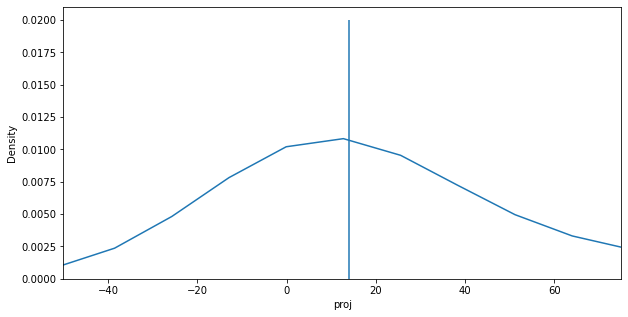

In [150]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_allP_freq["proj"], palette="tab10")
plt.xlim([-50,75])
plt.vlines(x=14, ymin=0, ymax=0.02)

plt.show()

In [151]:
perv_sites_othermod = pd.merge(data_all_mod, gen_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID", "UP_POS"])
perv_sites_othermod

,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,unimod,modification,tissue,enrichment,modification_enrichment,method,additional
0,PXD000004,AVCMLSNTTAIAEAWAR,S,379,Q6PEY2,374,390,4,[4]Carbamidomethyl,Brain,None,None,None,None
1,PXD000004,AVCMLSNTTAIAEAWAR,S,379,Q6PEY2,374,390,4,[4]Carbamidomethyl,Brain,None,None,None,None
2,PXD000004,AVCMLSNTTAIAEAWAR,S,379,Q6PEY2,374,390,4,[4]Carbamidomethyl,Brain,None,None,None,None
3,PXD000004,AVCMLSNTTAIAEAWAR,S,379,Q6PEY2,374,390,4,[4]Carbamidomethyl,Brain,None,None,None,None
4,PXD000529,AVCMLSNTTAIAEAWAR,S,379,Q6PEY2,374,390,977,[977]Carbofuran,Liver,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844729,PXD011175,RDSFIGTPYWMAPEVVMCETSK,T,193,Q9H2G2,187,208,40,[40]Sulfo,Lymph node,Yes,Phosphorylation,IMAC,Fe(III)-NTA-IMAC-based enrichment?
844730,PXD011175,TPGTPGTPSYPR,T,1616,P11137,1613,1624,40,[40]Sulfo,Lymph node,Yes,Phosphorylation,IMAC,Fe(III)-NTA-IMAC-based enrichment?
844731,PXD011175,QGLGPASTTSPSPGPR,S,899,P98171,890,905,40,[40]Sulfo,Lymph node,Yes,Phosphorylation,IMAC,Fe(III)-NTA-IMAC-based enrichment?
844732,PXD011175,RGSSAAASPGSPPPGR,S,11,Q86UX6,8,23,40,[40]Sulfo,Lymph node,Yes,Phosphorylation,IMAC,Fe(III)-NTA-IMAC-based enrichment?


In [152]:
perv_sites_othermod_freq = perv_sites_othermod.groupby(["ACC_ID", "UP_POS", "modification"],as_index=False)["proj"].count()
perv_sites_othermod_freq

,ACC_ID,UP_POS,modification,proj
0,A0A0C4DH39,51,[1868]MeMePhosphorothioate,4
1,A0A0C4DH39,51,[1987]Dimethylphosphothione,1
2,A0A0C4DH39,51,[363]Isopropylphospho,1
3,A0A0C4DH39,51,[40]Sulfo,1
4,A0A0C4DH39,51,[723]O-Dimethylphosphate,1
...,...,...,...,...
26740,Q9Y6V0,4395,[40]Sulfo,1
26741,Q9Y6V0,4395,[898]pyrophospho,2
26742,Q9Y6X4,635,[40]Sulfo,2
26743,Q9Y6X4,635,[898]pyrophospho,1


In [153]:
perv_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     2993
[4]Carbamidomethyl             787
[898]pyrophospho               768
[122]Formyl                    625
[35]Oxidation                  591
                              ... 
[534]Dibromo                    13
[292]IodoU-AMP                  12
[1801]Fluorescein-tyramine      10
[131]Triiodo                     5
[397]Triiodothyronine            1
Name: modification, Length: 133, dtype: int64

In [154]:
taspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     5898
[4]Carbamidomethyl            1295
[35]Oxidation                  957
[122]Formyl                    937
[5]Carbamyl                    912
                              ... 
[417]PhosphoUridine              8
[1801]Fluorescein-tyramine       5
[534]Dibromo                     3
[131]Triiodo                     1
[397]Triiodothyronine            1
Name: modification, Length: 133, dtype: int64

In [155]:
tspec_sites_othermod_freq["modification"].value_counts()

[40]Sulfo                     9177
[4]Carbamidomethyl            2400
[472]AEC-MAEC                 1662
[122]Formyl                   1579
[35]Oxidation                 1567
                              ... 
[417]PhosphoUridine              7
[292]IodoU-AMP                   6
[1801]Fluorescein-tyramine       5
[534]Dibromo                     4
[131]Triiodo                     1
Name: modification, Length: 132, dtype: int64

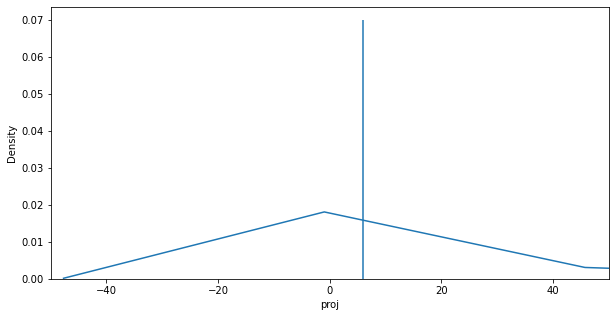

In [157]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_othermod_freq["proj"])
plt.xlim([-50,50])
plt.vlines(x=6, ymin=0, ymax=0.07)

plt.show()

In [158]:
perv_sites_othermod_freq_gr = perv_sites_othermod_freq.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"proj": "mean"
                                                                                                              })
perv_sites_othermod_freq_gr

,ACC_ID,UP_POS,proj
0,A0A0C4DH39,51,1.600000
1,A0JNW5,1402,1.000000
2,A2RU30,454,5.000000
3,A5A3E0,939,49.048780
4,A5A3E0,940,126.023256
...,...,...,...
3193,Q9Y6V0,3585,7.000000
3194,Q9Y6V0,4023,3.000000
3195,Q9Y6V0,4395,1.500000
3196,Q9Y6X4,635,1.500000


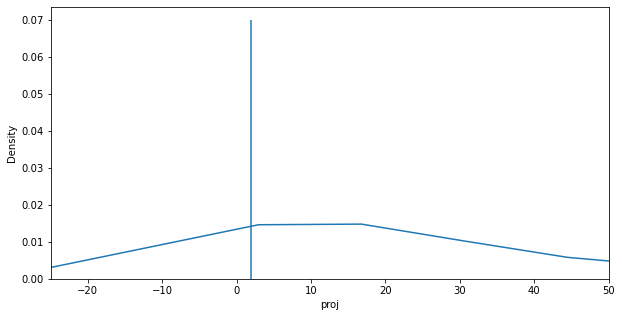

In [159]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_othermod_freq_gr["proj"])
plt.xlim([-25,50])
plt.vlines(x=2, ymin=0, ymax=0.07)

plt.show()

In [160]:
perv_sites_comb_freq = pd.merge(perv_sites_othermod_freq_gr, perv_sites_allP_freq, how="inner", on=["ACC_ID", "UP_POS"], suffixes=["_othermod", "_P"])


print(perv_sites_comb_freq.shape[0])

3198


In [161]:
print(pd.merge(perv_sites_othermod_freq_gr, data_all_mod_res, how="inner", on=["ACC_ID", "UP_POS"]).shape[0])

3198


In [163]:
print(perv_sites_comb_freq.shape[0])
print(perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]].shape[0])
print(perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]].shape[0]*100/gen_sites.shape[0])
print(perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]].shape[0]*100/perv_sites_comb_freq.shape[0])
perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]]

3198
1799
52.81855549031121
56.25390869293308


,ACC_ID,UP_POS,proj_othermod,proj_P
1,A0JNW5,1402,1.000000,7
6,A5A3E0,1062,64.477273,253
10,A6NMY6,18,19.500000,85
11,A6NMY6,19,25.266667,244
12,A6NMY6,24,34.800000,163
...,...,...,...,...
3178,Q9Y6R1,257,53.000000,83
3182,Q9Y6V0,1404,1.000000,2
3186,Q9Y6V0,1537,1.000000,1
3192,Q9Y6V0,1894,1.000000,2


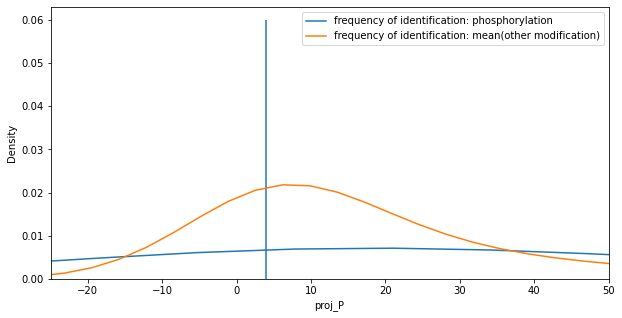

In [164]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]<=perv_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: mean(other modification)")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.06)
plt.legend()

plt.show()

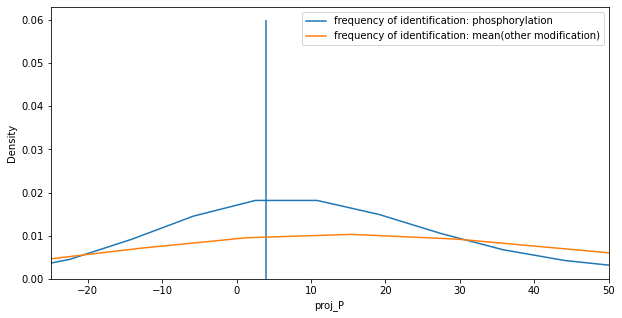

In [165]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]>perv_sites_comb_freq["proj_P"]]["proj_P"], label="frequency of identification: phosphorylation")
sns.kdeplot(x=perv_sites_comb_freq[perv_sites_comb_freq["proj_othermod"]>perv_sites_comb_freq["proj_P"]]["proj_othermod"], label="frequency of identification: mean(other modification)")
plt.xlim([-25,50])
plt.vlines(x=4, ymin=0, ymax=0.06)
plt.legend()

plt.show()